## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

## Importing and Cleaning dataset

In [2]:
df_during <- read_excel(path = here('Data','during_dataset.xlsx'))
df_during <- data.frame(df_during)
unique(sapply(df_during, class))
df_during <- df_during[complete.cases(df_during), ]
dim(df_during)
head(df_during)

[1] "numeric"

[1] 1250   44

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,soccer,tennis,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Converting dataset types and labels

In [3]:
df_during$PA_intensity[df_during$PA_intensity == 4] <- 0
df_during$PA_duration[df_during$PA_duration == 5] <- 0
df_during$PA_weekly_frequency[df_during$PA_weekly_frequency == 4] <- 0
df_during$PA_practice_during <- ifelse(df_during$PA_practice_during == 0, 1, 0)
df_during$sedentary_time_range_during[df_during$sedentary_time_range_during < 5] <- 0
df_during$sedentary_time_range_during[df_during$sedentary_time_range_during == 5] <- 1
sum(df_during[, "PA_practice_during"])

[1] 900

In [4]:
sports <- c("running","hiking","cycling",
            "muscle_training","soccer","tennis",
            "volleyball","basketball","swimming",
            "surfing","yoga","pilates","fighting","other_sports")

df_during$PA_number <- rowSums(df_during[, sports])

In [5]:
df_during <- df_during[df_during$sex != 3, ]
 

### Separing barriers from dataset

In [6]:
colnames(df_during)
head(df_during)

[1] "PA_barrier_time_family_responsabilities"
 [2] "PA_barrier__tiredness"                  
 [3] "PA_barrier_places_closed_dangerous"     
 [4] "PA_barrier_money"                       
 [5] "PA_barrier_time_convenience"            
 [6] "PA_barrier_hard_work"                   
 [7] "PA_barrier_no_interest"                 
 [8] "PA_barrier_none"                        
 [9] "PA_easiness_outdoor_activities"         
[10] "PA_easiness_professional_guidance"      
[11] "PA_easiness_unguided"                   
[12] "PA_easiness_music"                      
[13] "PA_easiness_collective"                 
[14] "PA_easiness_home_activity"              
[15] "PA_easiness_family_activity"            
[16] "PA_easiness_home_space"                 
[17] "PA_easiness_home_equipament"            
[18] "PA_easiness_others"                     
[19] "PA_weekly_frequency"                    
[20] "PA_intensity"                           
[21] "PA_duration"                            
[22] "PA_practice_during"                     
[23] "sedentary_time_range_during"            
[24] "sex"                                    
[25] "age_range"                              
[26] "martialStatus"                          
[27] "co.resident_range"                      
[28] "rooms_range"                            
[29] "income_range"                           
[30] "scholarity"                             
[31] "running"                                
[32] "hiking"                                 
[33] "cycling"                                
[34] "muscle_training"                        
[35] "soccer"                                 
[36] "tennis"                                 
[37] "volleyball"                             
[38] "basketball"                             
[39] "swimming"                               
[40] "surfing"                                
[41] "yoga"                                   
[42] "pilates"                                
[43] "fighting"                               
[44] "other_sports"                           
[45] "PA_number"

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,tennis,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports,PA_number
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2


In [7]:
df_during[1:18] <- lapply(df_during[1:18], as.factor)
df_during_barriers <- df_during[, 1:8]
dim(df_during_barriers)
head(df_during_barriers)

[1] 1247    8

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0


In [8]:
names(df_during_barriers)[8] <- 'PA_barrier_percieve'

### Removing Strangers

In [9]:
differ_p <- (   df_during$PA_duration == 0 
                | df_during$PA_intensity == 0 
                | df_during$PA_weekly_frequency == 0
                | df_during$PA_number == 0
            )
strange_p <- df_during$PA_practice_during == 1 & differ_p
df_during <- df_during[!strange_p, ]
df_during_barriers <- df_during_barriers[!strange_p, ]
table(strange_p)

differ_dp <- ( df_during$PA_duration != 0 
                | df_during$PA_intensity != 0 
                | df_during$PA_weekly_frequency != 0
                | df_during$PA_number != 0
            ) 
strange_dp <- df_during$PA_practice_during == 0 & differ_dp 


table(strange_dp)
df_during <- df_during[!strange_dp, ]
df_during_barriers <- df_during_barriers[!strange_dp, ]

strange_p
FALSE  TRUE 
 1241     6 

strange_dp
FALSE  TRUE 
 1215    26 

### Agregate barriers and clean them


In [10]:

time_barrier_1 <- ifelse(df_during_barriers$PA_barrier_time_family_responsabilities=='0',0,1)
time_barrier_2 <- ifelse(df_during_barriers$PA_barrier_time_convenience=='0',0,1)


hard_barrier_1 <- ifelse(df_during_barriers$PA_barrier__tiredness=='0',0,1)
hard_barrier_2 <- ifelse(df_during_barriers$PA_barrier_hard_work=='0',0,1)


df_during_barriers$PA_barrier_time <- (time_barrier_1 | time_barrier_2) + 0 
df_during_barriers$PA_barrier_hard <- (hard_barrier_1 | hard_barrier_2) + 0

In [11]:
df_during_barriers$PA_barrier_time_family_responsabilities <- NULL
df_during_barriers$PA_barrier_time_convenience <- NULL

df_during_barriers$PA_barrier__tiredness <- NULL
df_during_barriers$PA_barrier_hard_work <- NULL

In [12]:
names(df_during_barriers)

[1] "PA_barrier_places_closed_dangerous" "PA_barrier_money"                  
[3] "PA_barrier_no_interest"             "PA_barrier_percieve"               
[5] "PA_barrier_time"                    "PA_barrier_hard"

## Clustering - Kmodes

In [13]:
df_during_barriers_dist <- distinct(df_during_barriers)
nrow(df_during_barriers_dist)

[1] 33

### Silhoette 
<hr />

In [14]:
df_matrix <- data.matrix(df_during_barriers_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_barriers_dist) - similarity_matrix
head(dissimilarity_matrix)

0,1,2,1,1,2,2,2,2,3,...,2,3,4,4,1,4,3,3,3,5
1,0,3,2,2,3,3,1,3,2,...,3,4,3,3,2,5,4,2,2,4
2,3,0,3,3,2,2,4,4,3,...,2,3,2,4,1,2,3,5,3,3
1,2,3,0,2,1,1,1,1,2,...,3,2,3,3,2,3,4,2,4,4
1,2,3,2,0,3,3,3,1,4,...,3,4,5,5,2,3,2,2,4,4
2,3,2,1,3,0,2,2,2,1,...,2,1,2,2,1,2,3,3,3,3


#### Scanning parameters


In [15]:
# source(here('Modules','modules.R'))
# nseed <- 10
# nk <- nrow(distinct(df_during_barriers))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     silhouette_scs <- c()
#     for (k in 2:nk) {
#         sc <- silhouette_values_kmodes(
#             num_clusters = k,
#             df = df_during_barriers_dist,
#             diss_matrix = dissimilarity_matrix,
#             iters = 200,
#             s = seed)[[1]]

#         silhouette_scs <- append(silhouette_scs, sc)
#     }

#     ks_by_seed[seed, ] <- silhouette_scs
# }

# write.csv(
#     ks_by_seed,
#     "../../Data/silhouette_kmodes_or_barriers.csv", row.names = FALSE
# )

#### Results

In [16]:
scs <- read.csv("../../Data/silhouette_kmodes_or_barriers.csv")
scs[, ncol(scs)+1] <-  seq.int(nrow(scs))
colnames(scs) <- append(2:nrow(distinct(df_during_barriers)), "seed")
scs

2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,seed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.2881323,0.2665527,0.3439010,0.3234731,0.2598644,0.2622731,0.3022880,0.3467709,0.3451242,0.3287365,...,0.07575758,0.06060606,0.11085859,0.11515152,0.06060606,0.04545455,0.03030303,0.01515152,0,1
0.1618269,0.2229722,0.2944947,0.2539509,0.3555802,0.3244430,0.2319111,0.2256046,0.2781298,0.2671375,...,0.10101010,0.08080808,0.07575758,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,2
0.1962519,0.2000461,0.3142417,0.1911691,0.2510887,0.3602603,0.3275163,0.2733918,0.2340142,0.1997584,...,0.11085859,0.09570707,0.09570707,0.04545455,0.03030303,0.03030303,0.03030303,0.01515152,0,3
0.1850108,0.1619804,0.2151636,0.3139007,0.3307145,0.3642887,0.2866069,0.2470239,0.2869228,0.2821110,...,0.14545455,0.10404040,0.10404040,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,4
0.1860313,0.3223982,0.3547553,0.2991001,0.3337294,0.2834828,0.2115434,0.2516087,0.2488353,0.2627591,...,0.08888889,0.06060606,0.07575758,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,5
0.2032734,0.2619444,0.3158120,0.2545863,0.1586734,0.2000767,0.2000767,0.2002438,0.2337434,0.2382888,...,0.16818182,0.16818182,0.12676768,0.11161616,0.06060606,0.04545455,0.03030303,0.01515152,0,6
0.1940833,0.2797627,0.2827993,0.2740688,0.3421857,0.3501649,0.3573564,0.3535421,0.3756989,0.3642688,...,0.16363636,0.16363636,0.14848485,0.10707071,0.08686869,0.07171717,0.05656566,0.01515152,0,7
0.2315383,0.2292353,0.3137365,0.3386466,0.3013919,0.3288569,0.2925746,0.2585943,0.2498207,0.2249289,...,0.13232323,0.10404040,0.08888889,0.06060606,0.06060606,0.04545455,0.03030303,0.01515152,0,8
0.1496061,0.2068976,0.2700874,0.2582378,0.2968259,0.3453560,0.3349637,0.3337791,0.3040273,0.2712648,...,0.09090909,0.07575758,0.07575758,0.06060606,0.06060606,0.04545455,0.03030303,0.01515152,0,9


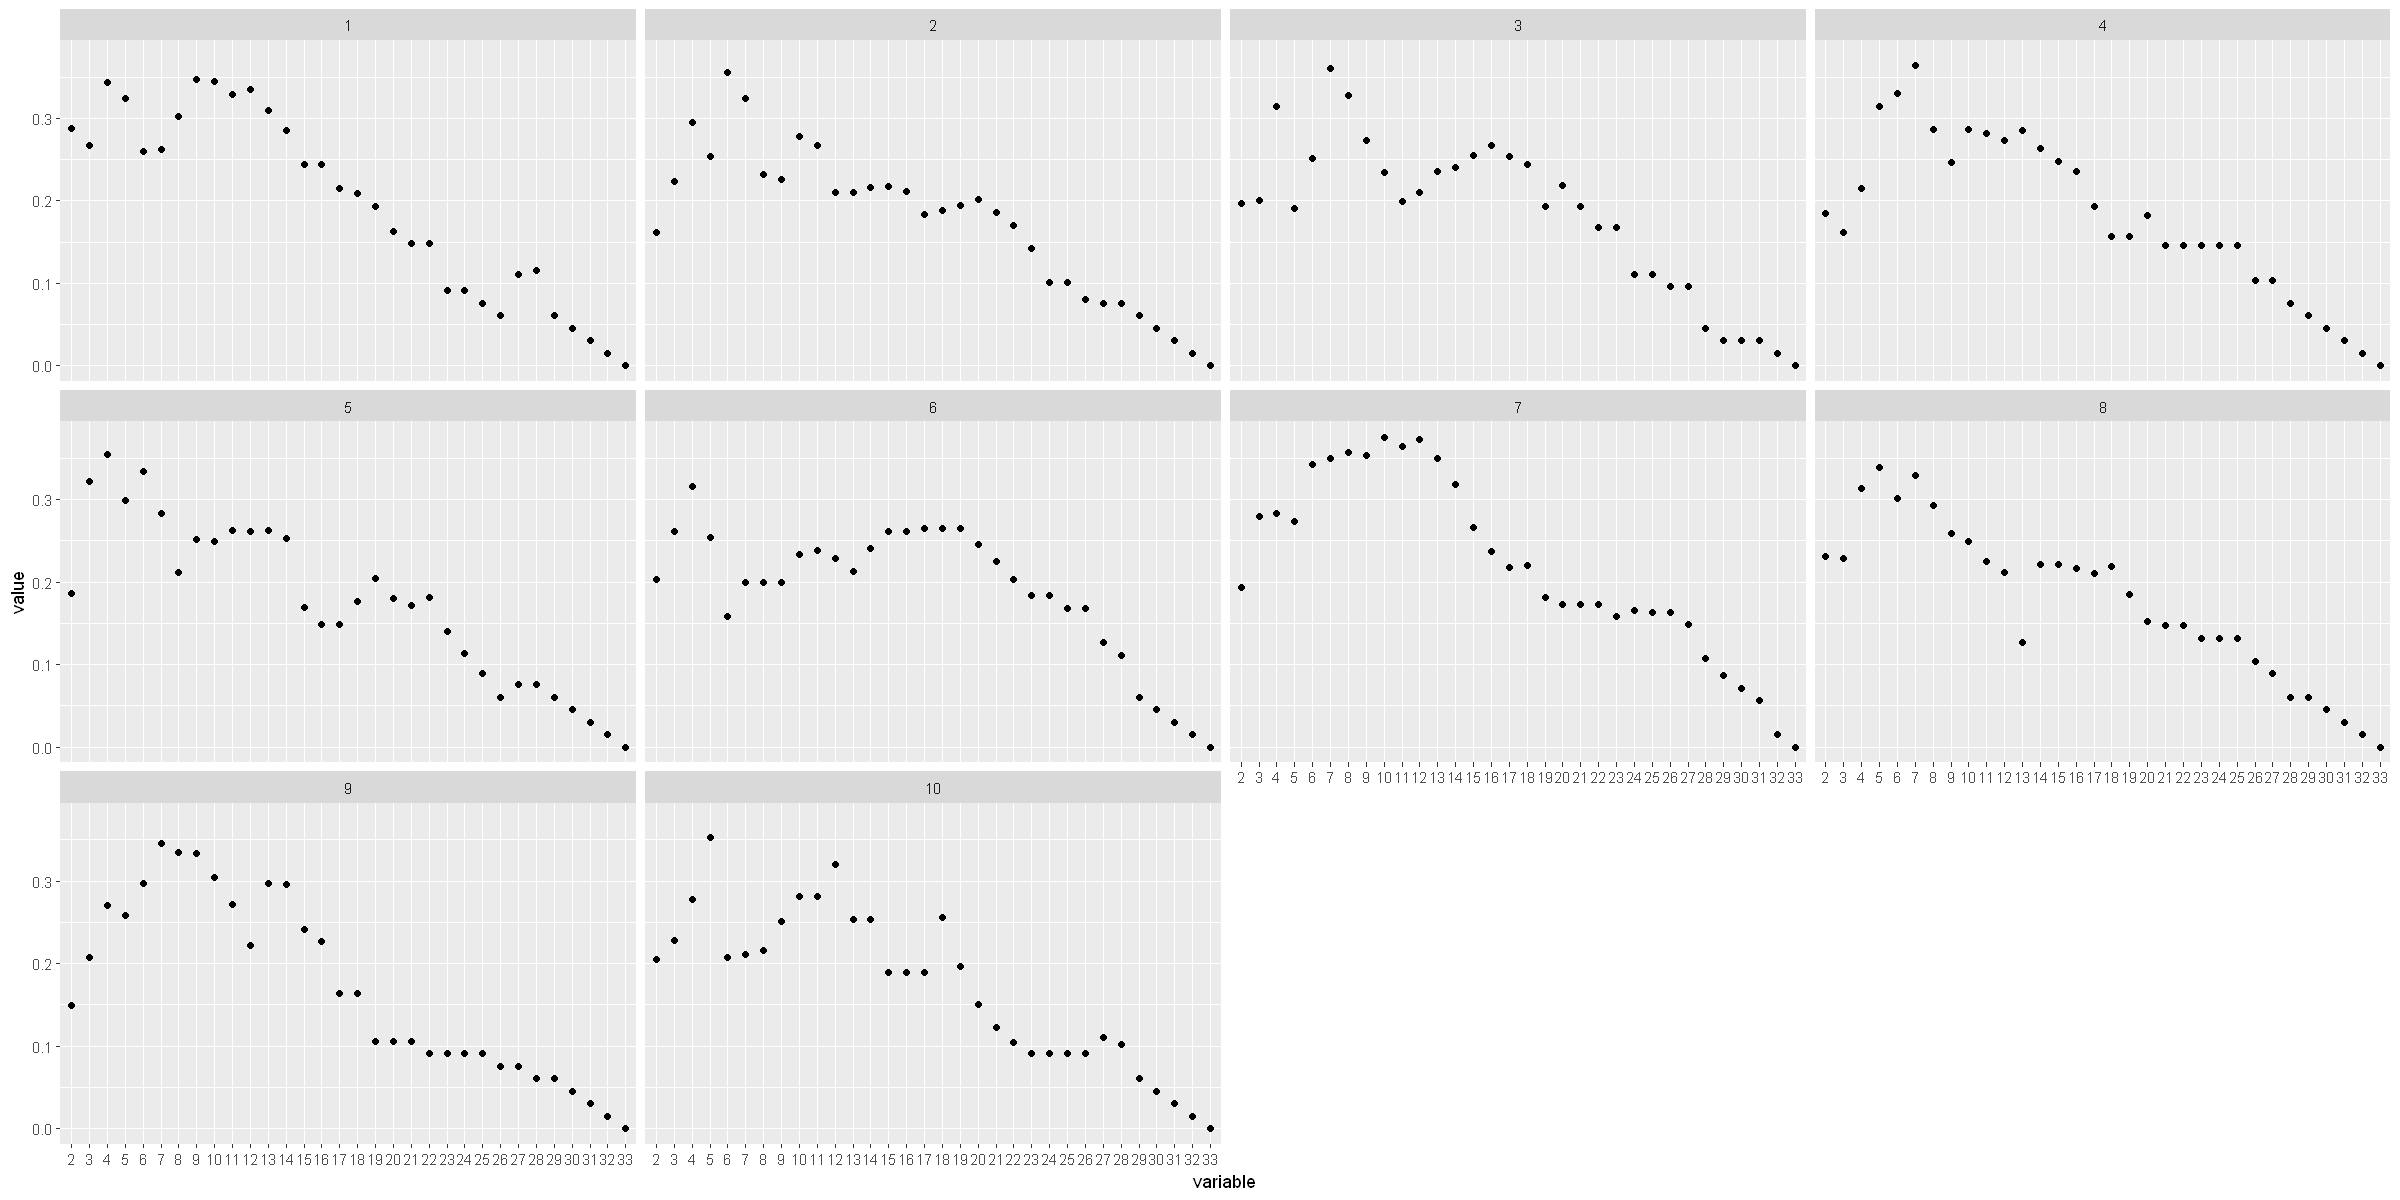

In [17]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(
   data=melt(scs, id.vars='seed'), aes(x = variable, y = value)
) + geom_point() + facet_wrap(~ seed) 


####  Best K and best seed by highest sample mean

In [18]:
print("Best K")
best_K_kmodes <- match(max(apply(scs, 2, mean)[1:ncol(scs)-1]), apply(scs, 2, mean))
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(scs[, best_K_kmodes]), scs[, best_K_kmodes])
print(best_seed_kmodes)
print("Silhouette")
print(max(scs[, best_K_kmodes]))

[1] "Best K"
[1] 6
[1] "Best Seed"
[1] 4
[1] "Silhouette"
[1] 0.3642887


#### Evaluating the silhuette coefficient for best seed

In [19]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=68)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() + 
#   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

In [20]:
# silhoutte_result <-  silhouette_values(num_clusters=4, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=62)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

In [21]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=13)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

### Fisher

<hr />

In [ ]:
# source(here('Modules','modules.R'))
# nseed <- 10
# nk <- nrow(distinct(df_during_barriers))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     fishers <- c()
#     for (k in 2:nk) {
#         fs <- fisher_values_kmodes(k, df_during_barriers_dist, 200, seed)[[1]]
#         fishers <- append(fishers, fs)
#     }

#     ks_by_seed[seed, ] <- fishers
# }

# write.csv(
#     ks_by_seed,
#     "../../Data/fisher_kmodes_or_barriers.csv", row.names = FALSE
# )

: 

: 

In [22]:
# fs <- read.csv("../../Data/fisher_kmodes_or_barriers.csv")
# fs[, ncol(fs)+1] <-  seq.int(nrow(fs))
# colnames(fs) <- append(2:nk, "seed")
# head(fs[order(apply(fs, 1, sum), decreasing=TRUE), ])

In [23]:
# options(repr.plot.width=20, repr.plot.height=10)
# ggplot(
#    data=melt(fs, id.vars='seed'), aes(x = variable, y = value)
# ) + geom_point() + facet_wrap(~ seed) 


## Exploring Kmodes best k

In [24]:
df_during_barriers_dist$cluster <- kmodes_seed(df_during_barriers_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)$cluster
head(df_during_barriers_dist)

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard,cluster
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>
1,1,0,0,0,0,0,2
2,1,0,1,0,0,0,5
3,0,0,0,0,1,0,3
4,1,0,0,0,0,1,4
5,1,1,0,0,0,0,2
6,0,0,0,0,0,1,1


In [25]:
joint <- c(
    'PA_barrier_places_closed_dangerous'='PA_barrier_places_closed_dangerous',
    'PA_barrier_money' = 'PA_barrier_money',
    'PA_barrier_no_interest'='PA_barrier_no_interest',
    'PA_barrier_percieve'='PA_barrier_percieve',
    'PA_barrier_time' = 'PA_barrier_time',
    'PA_barrier_hard' = 'PA_barrier_hard'
)

df_during_barriers <- left_join(df_during_barriers, df_during_barriers_dist, by = joint)
df_during$cluster <- df_during_barriers$cluster
nrow(df_during_barriers)

[1] 1215

In [26]:
table(df_during$cluster)


  1   2   3   4   5   6 
228 371 157 134  30 295 

### Profile Plots
<hr />

#### Practice of Exercise 

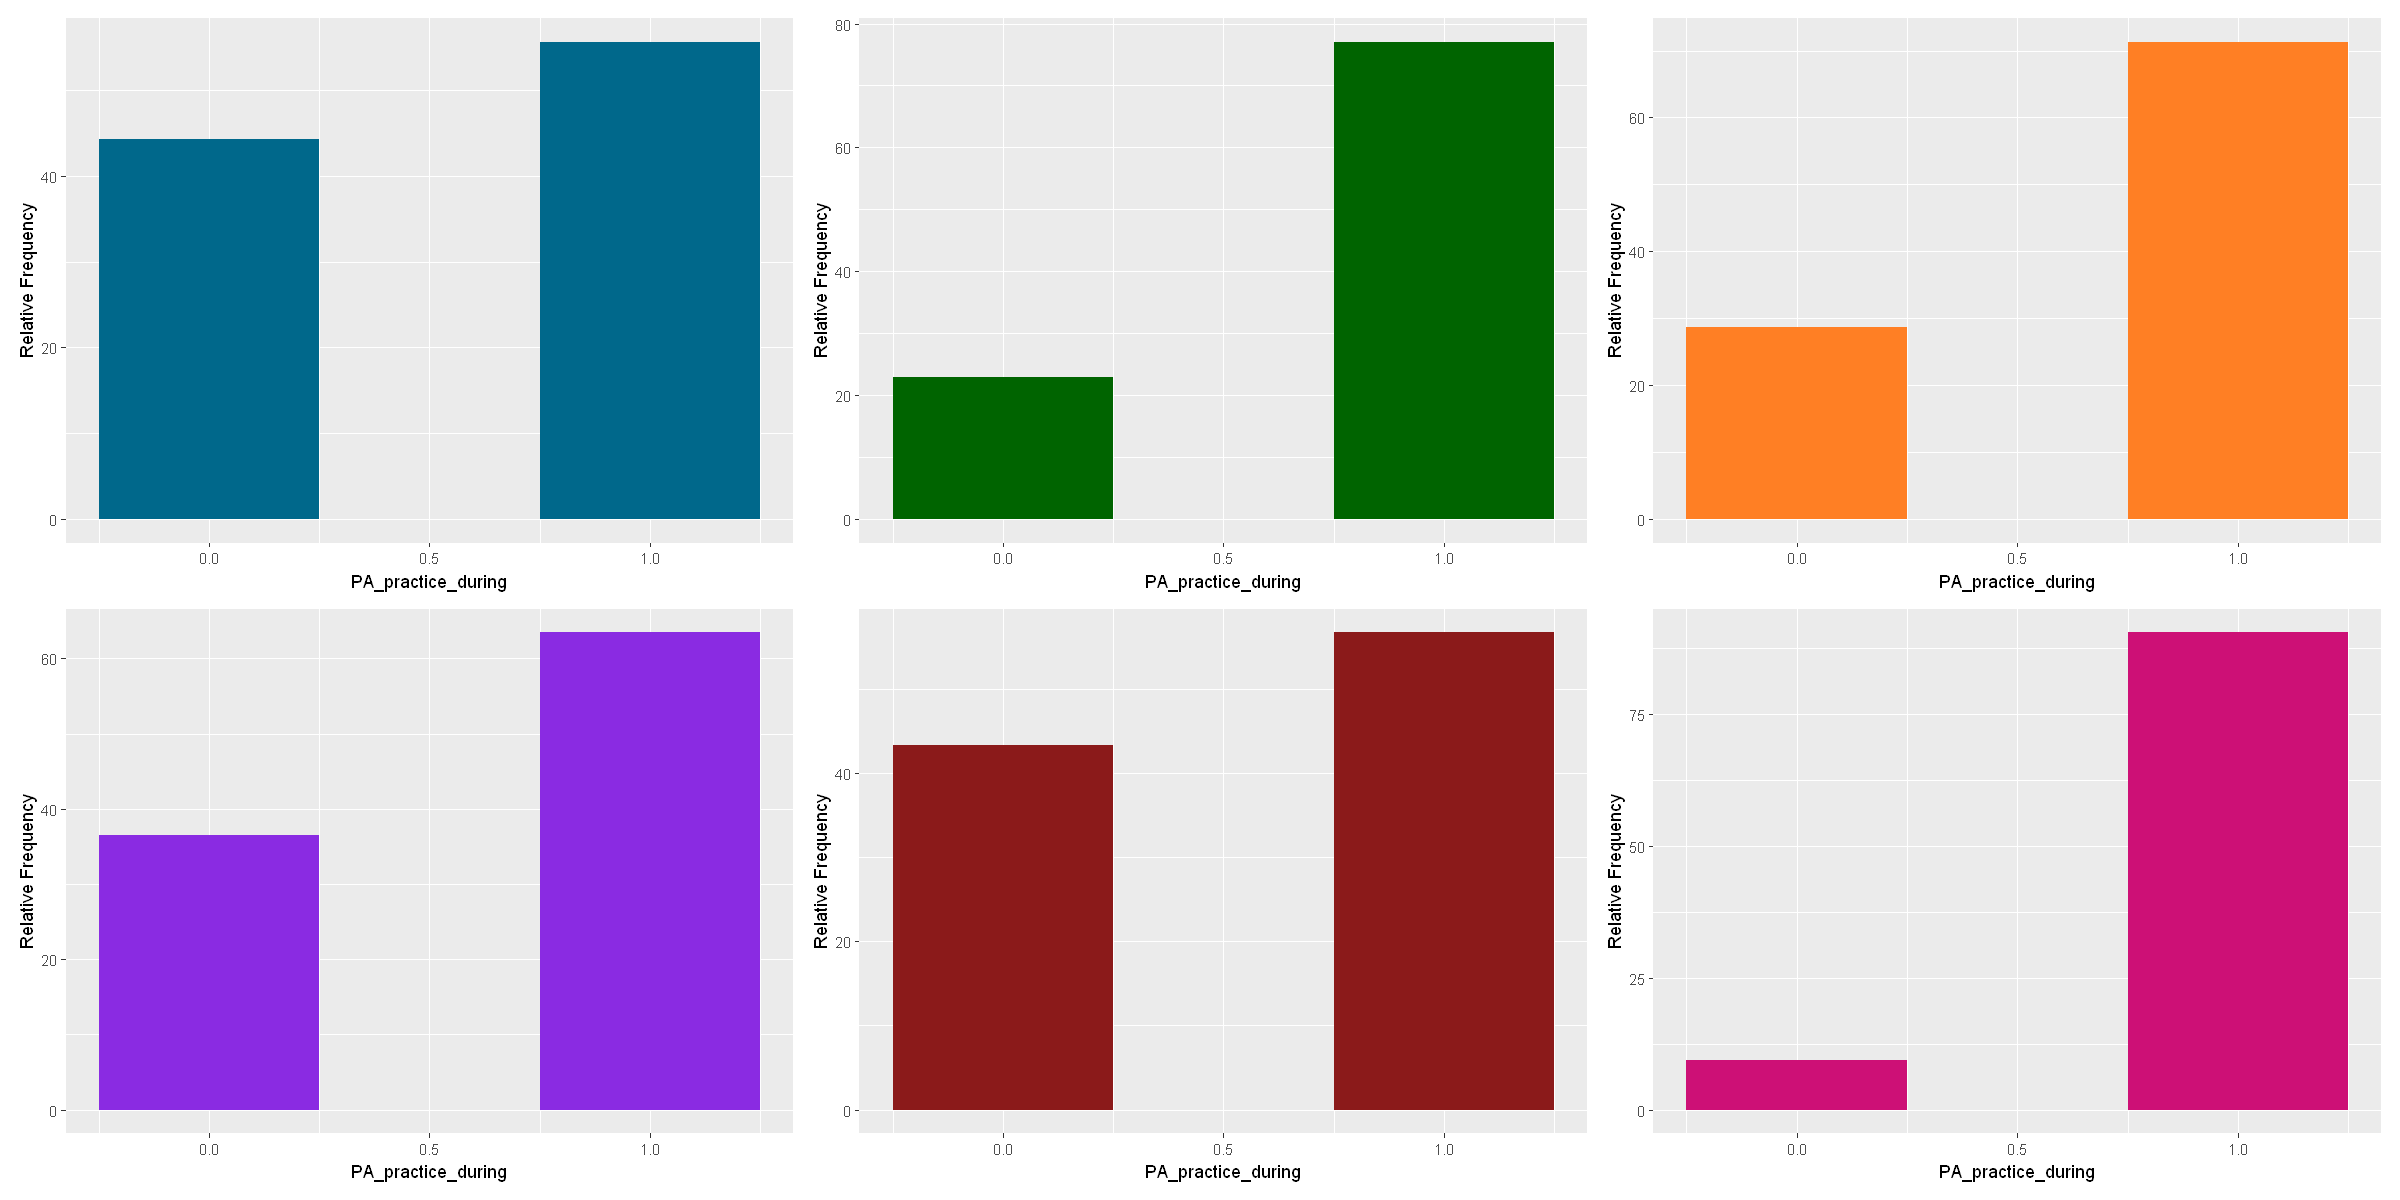

In [27]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_practice_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Sedentary Behavior

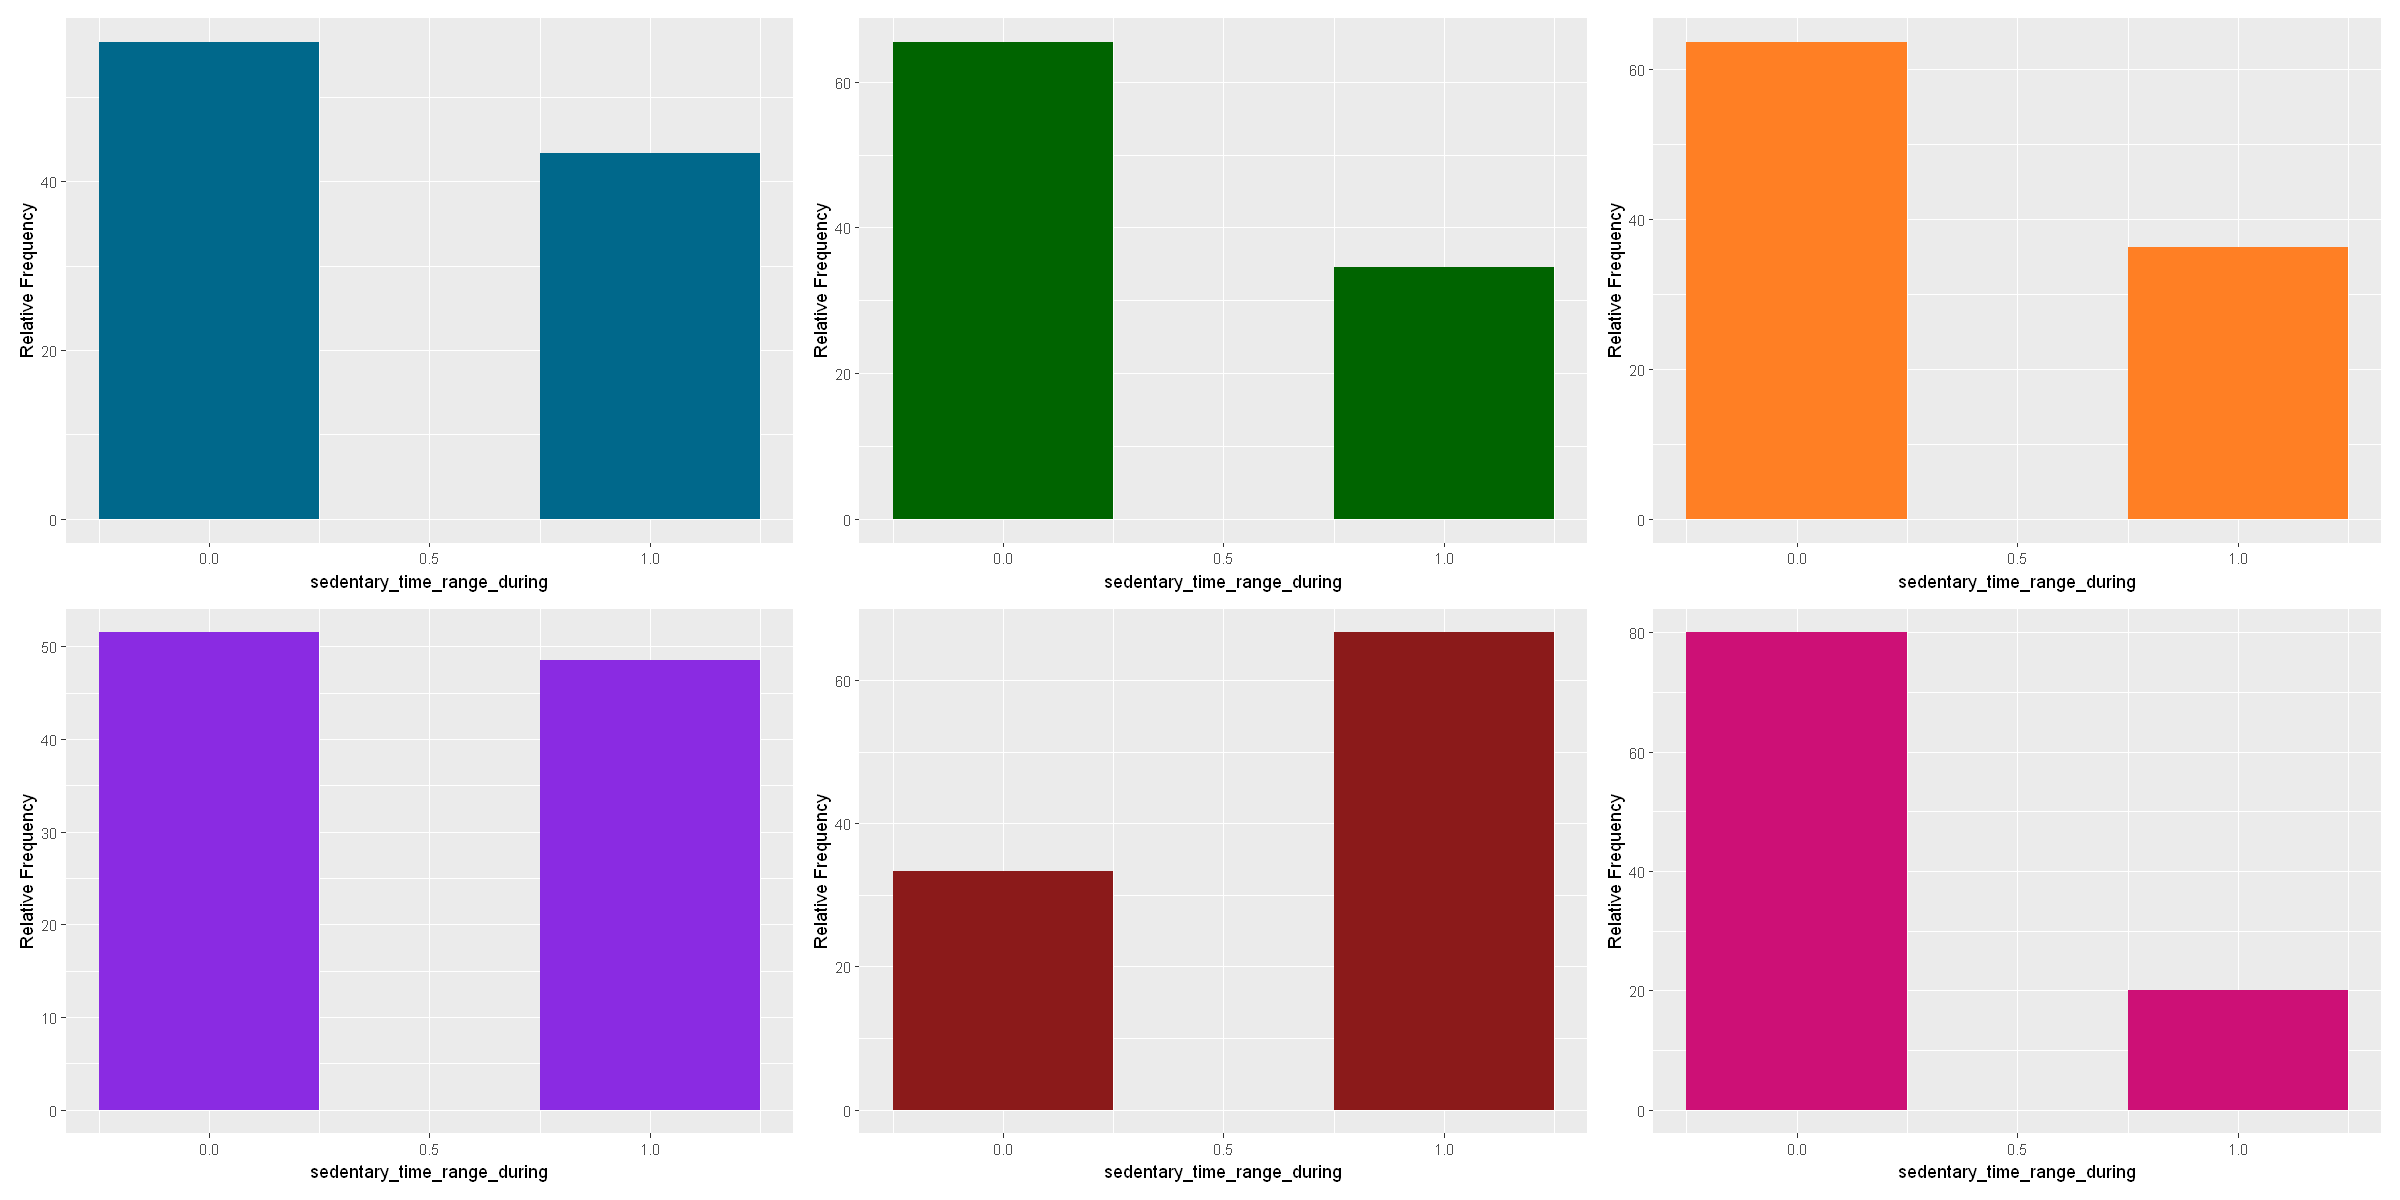

In [28]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=sedentary_time_range_during	, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Intensity

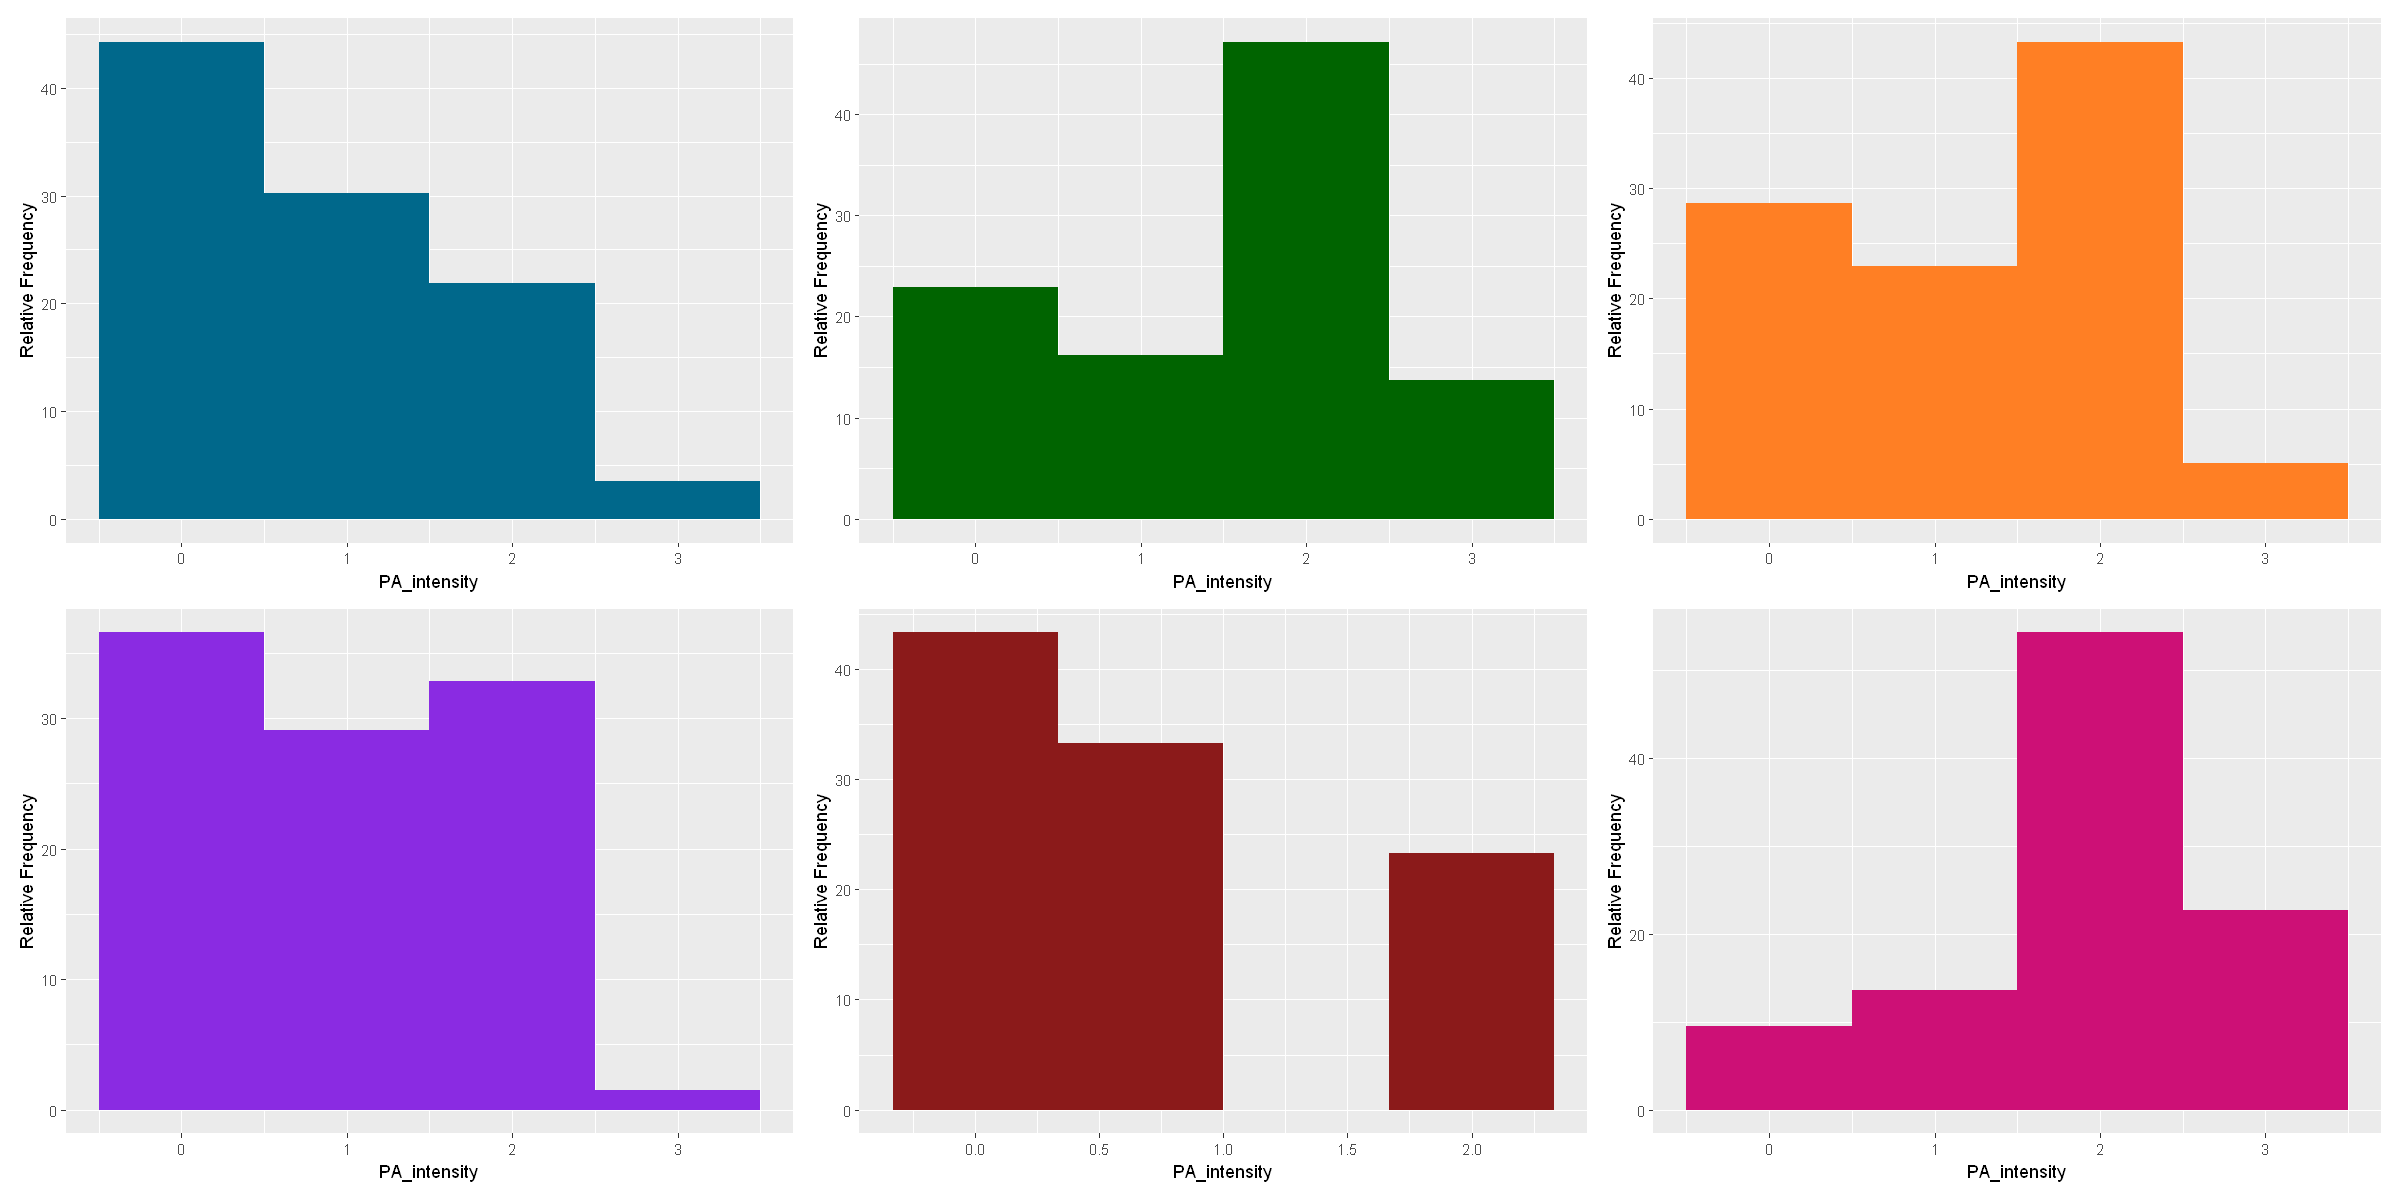

In [29]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_intensity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Duration

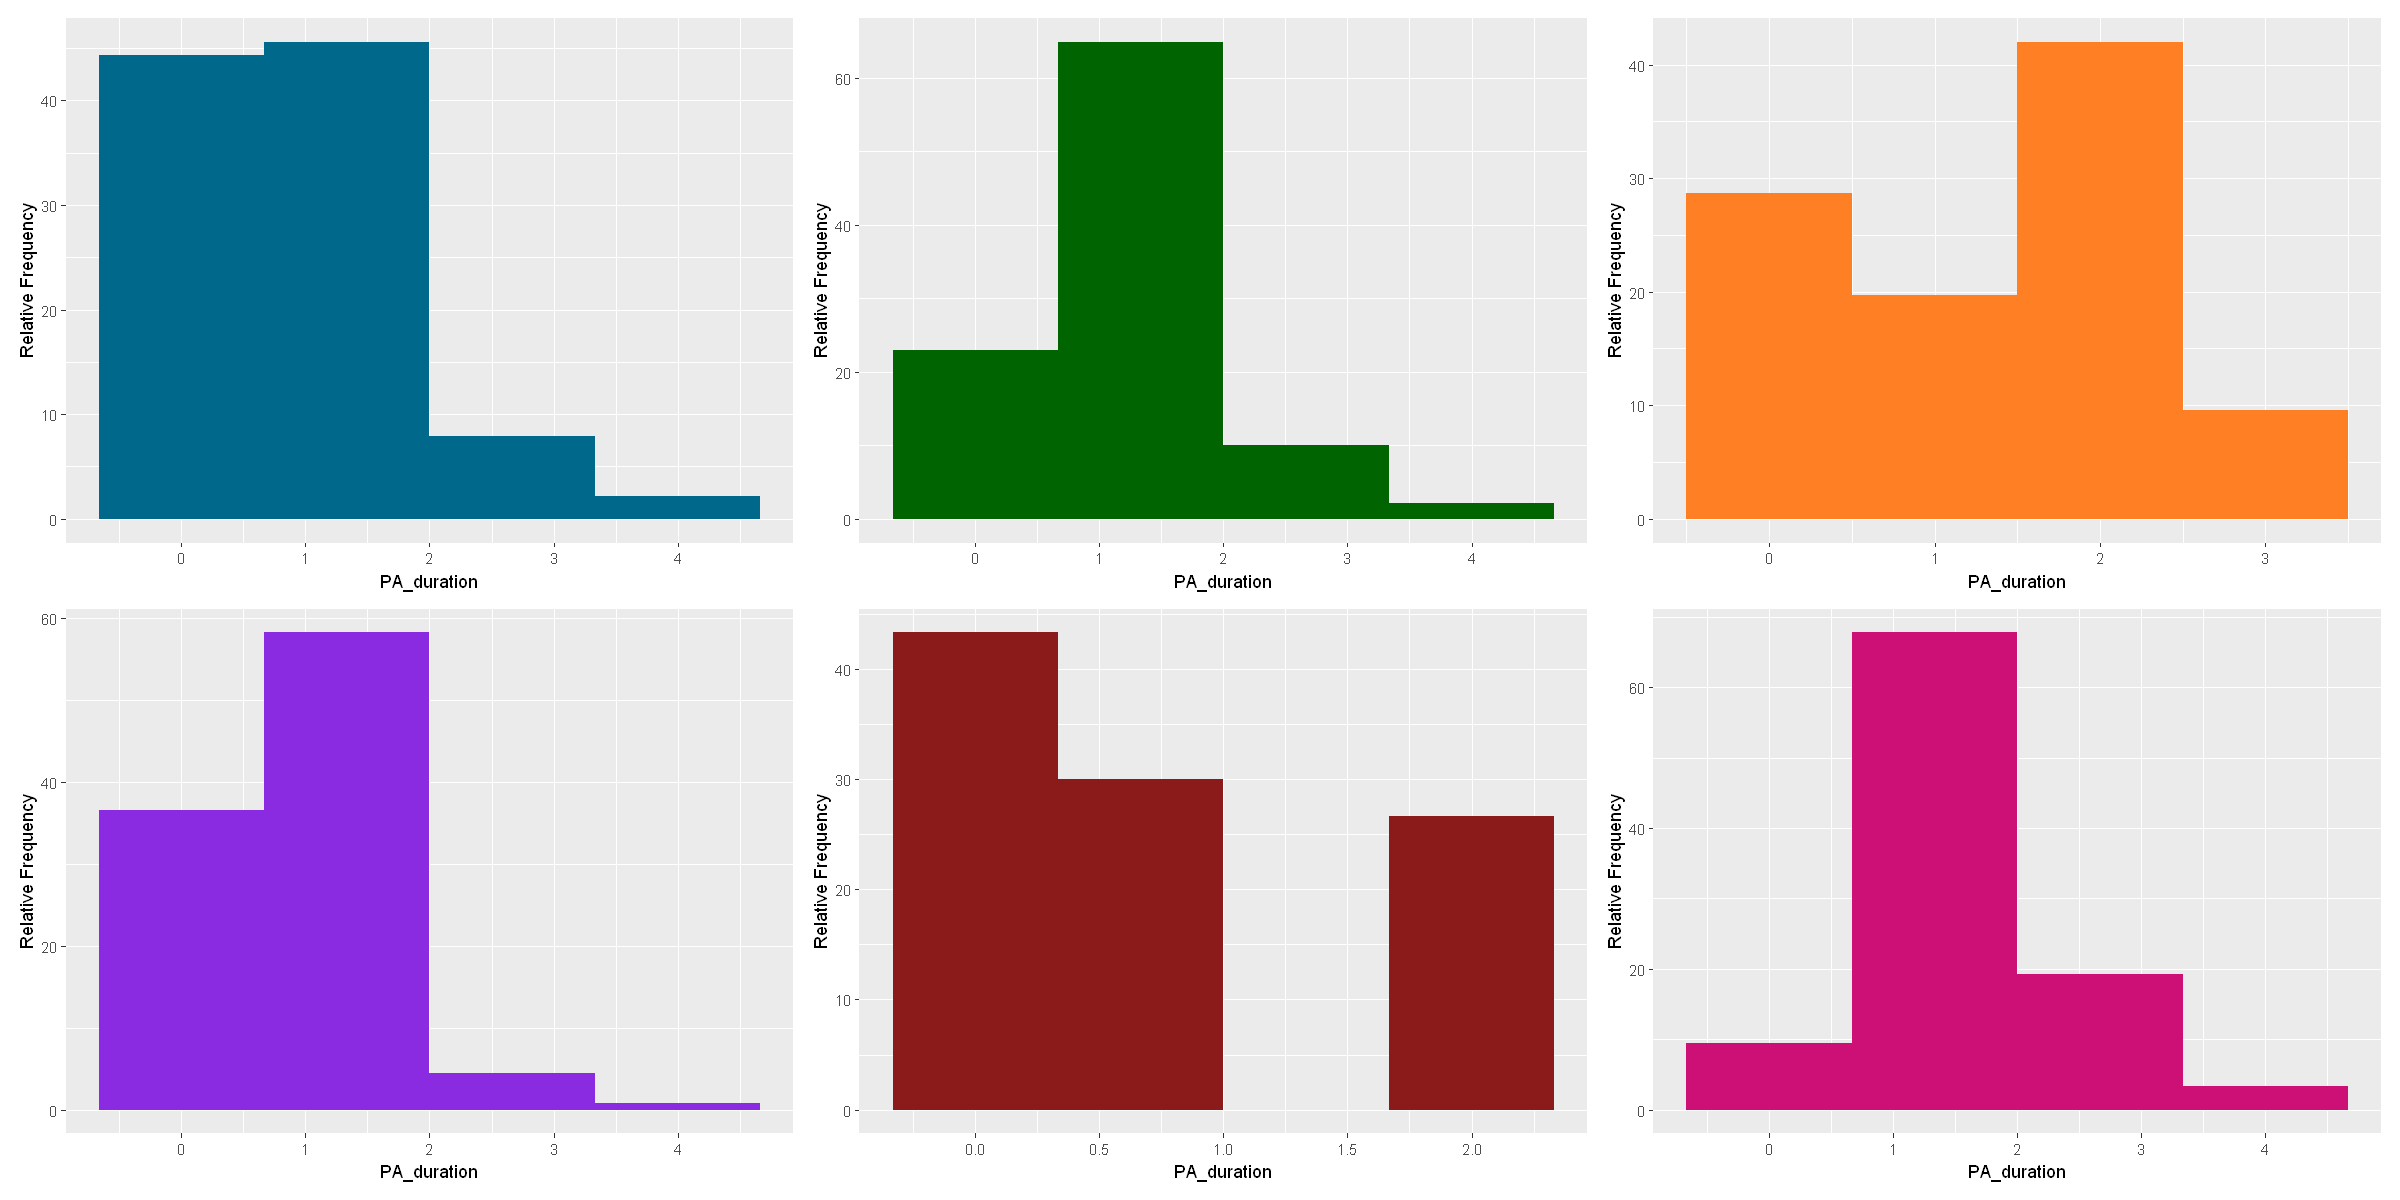

In [30]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_duration, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Weekly Frequency

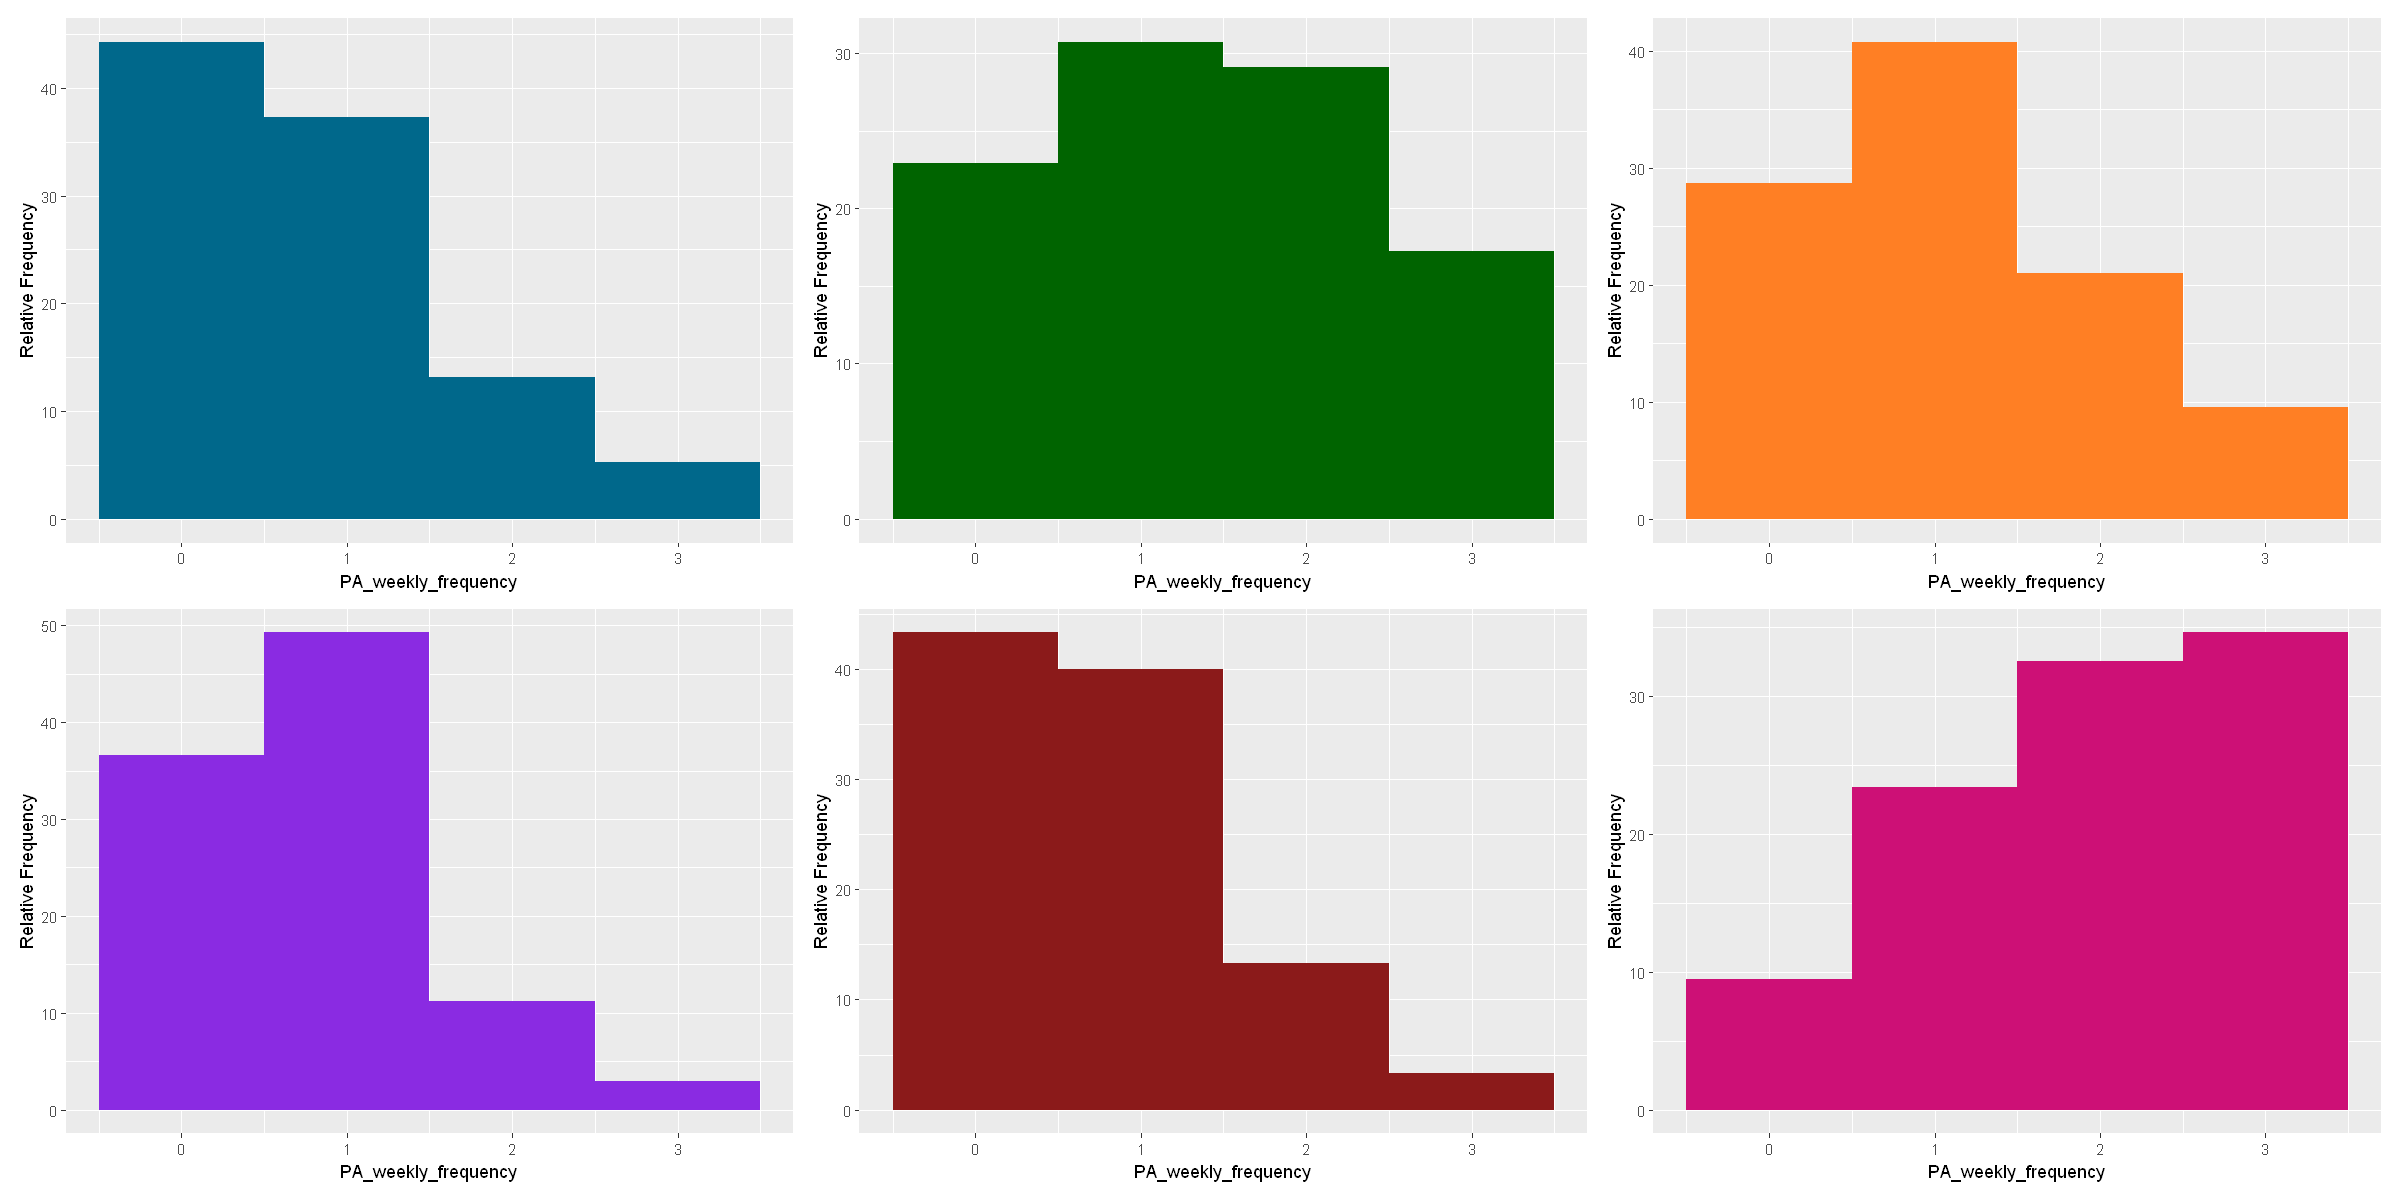

In [31]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_weekly_frequency, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Number of Exercises

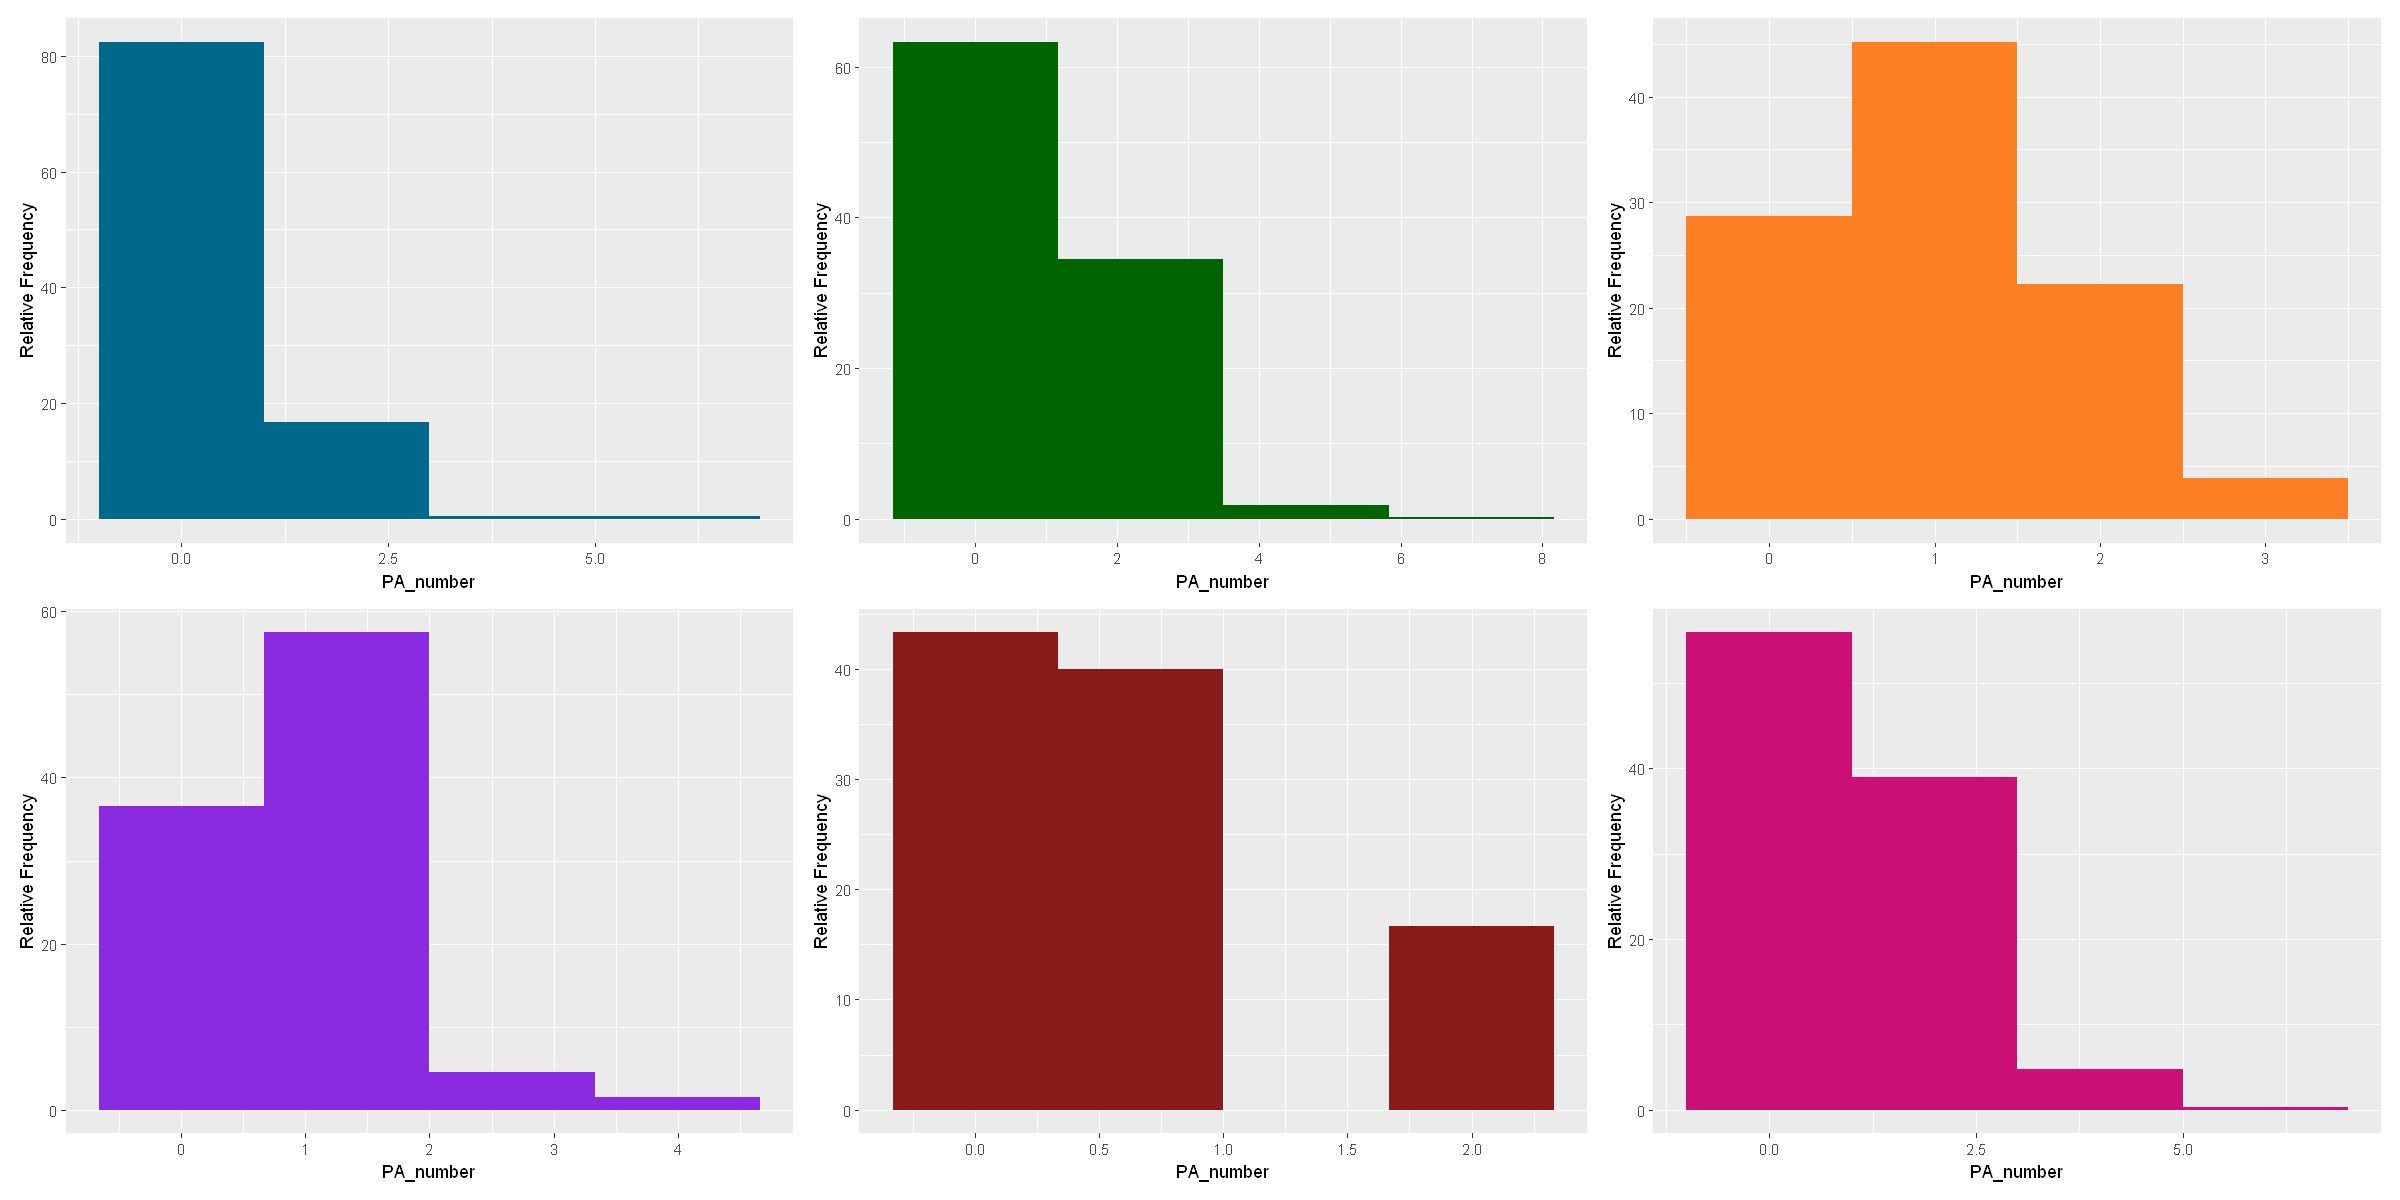

In [32]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_number, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Income Range

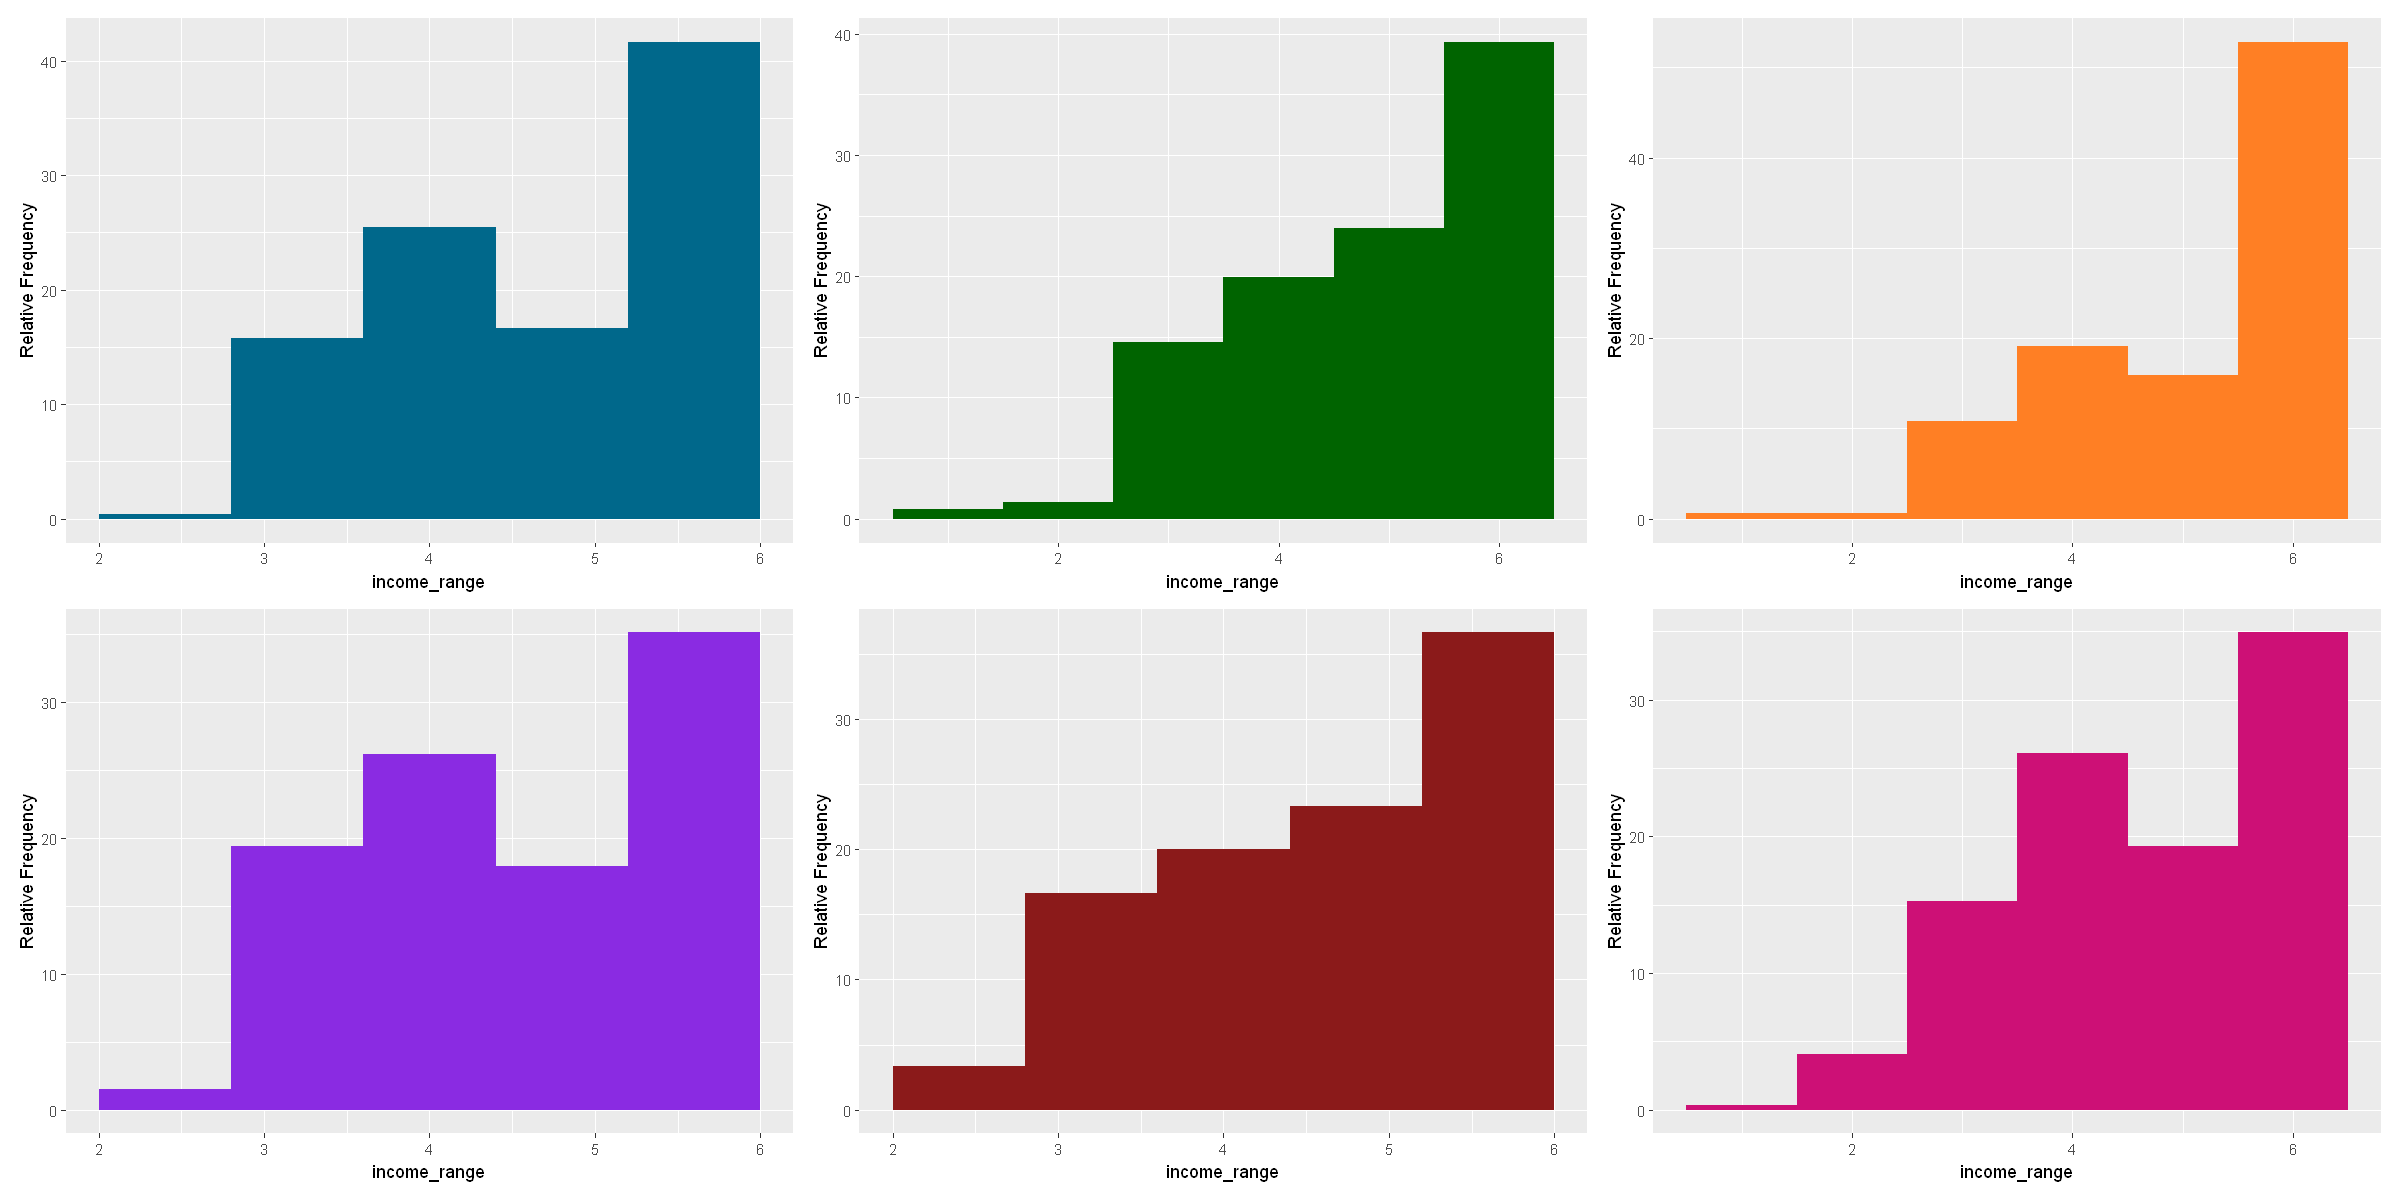

In [33]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 6,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Age Range

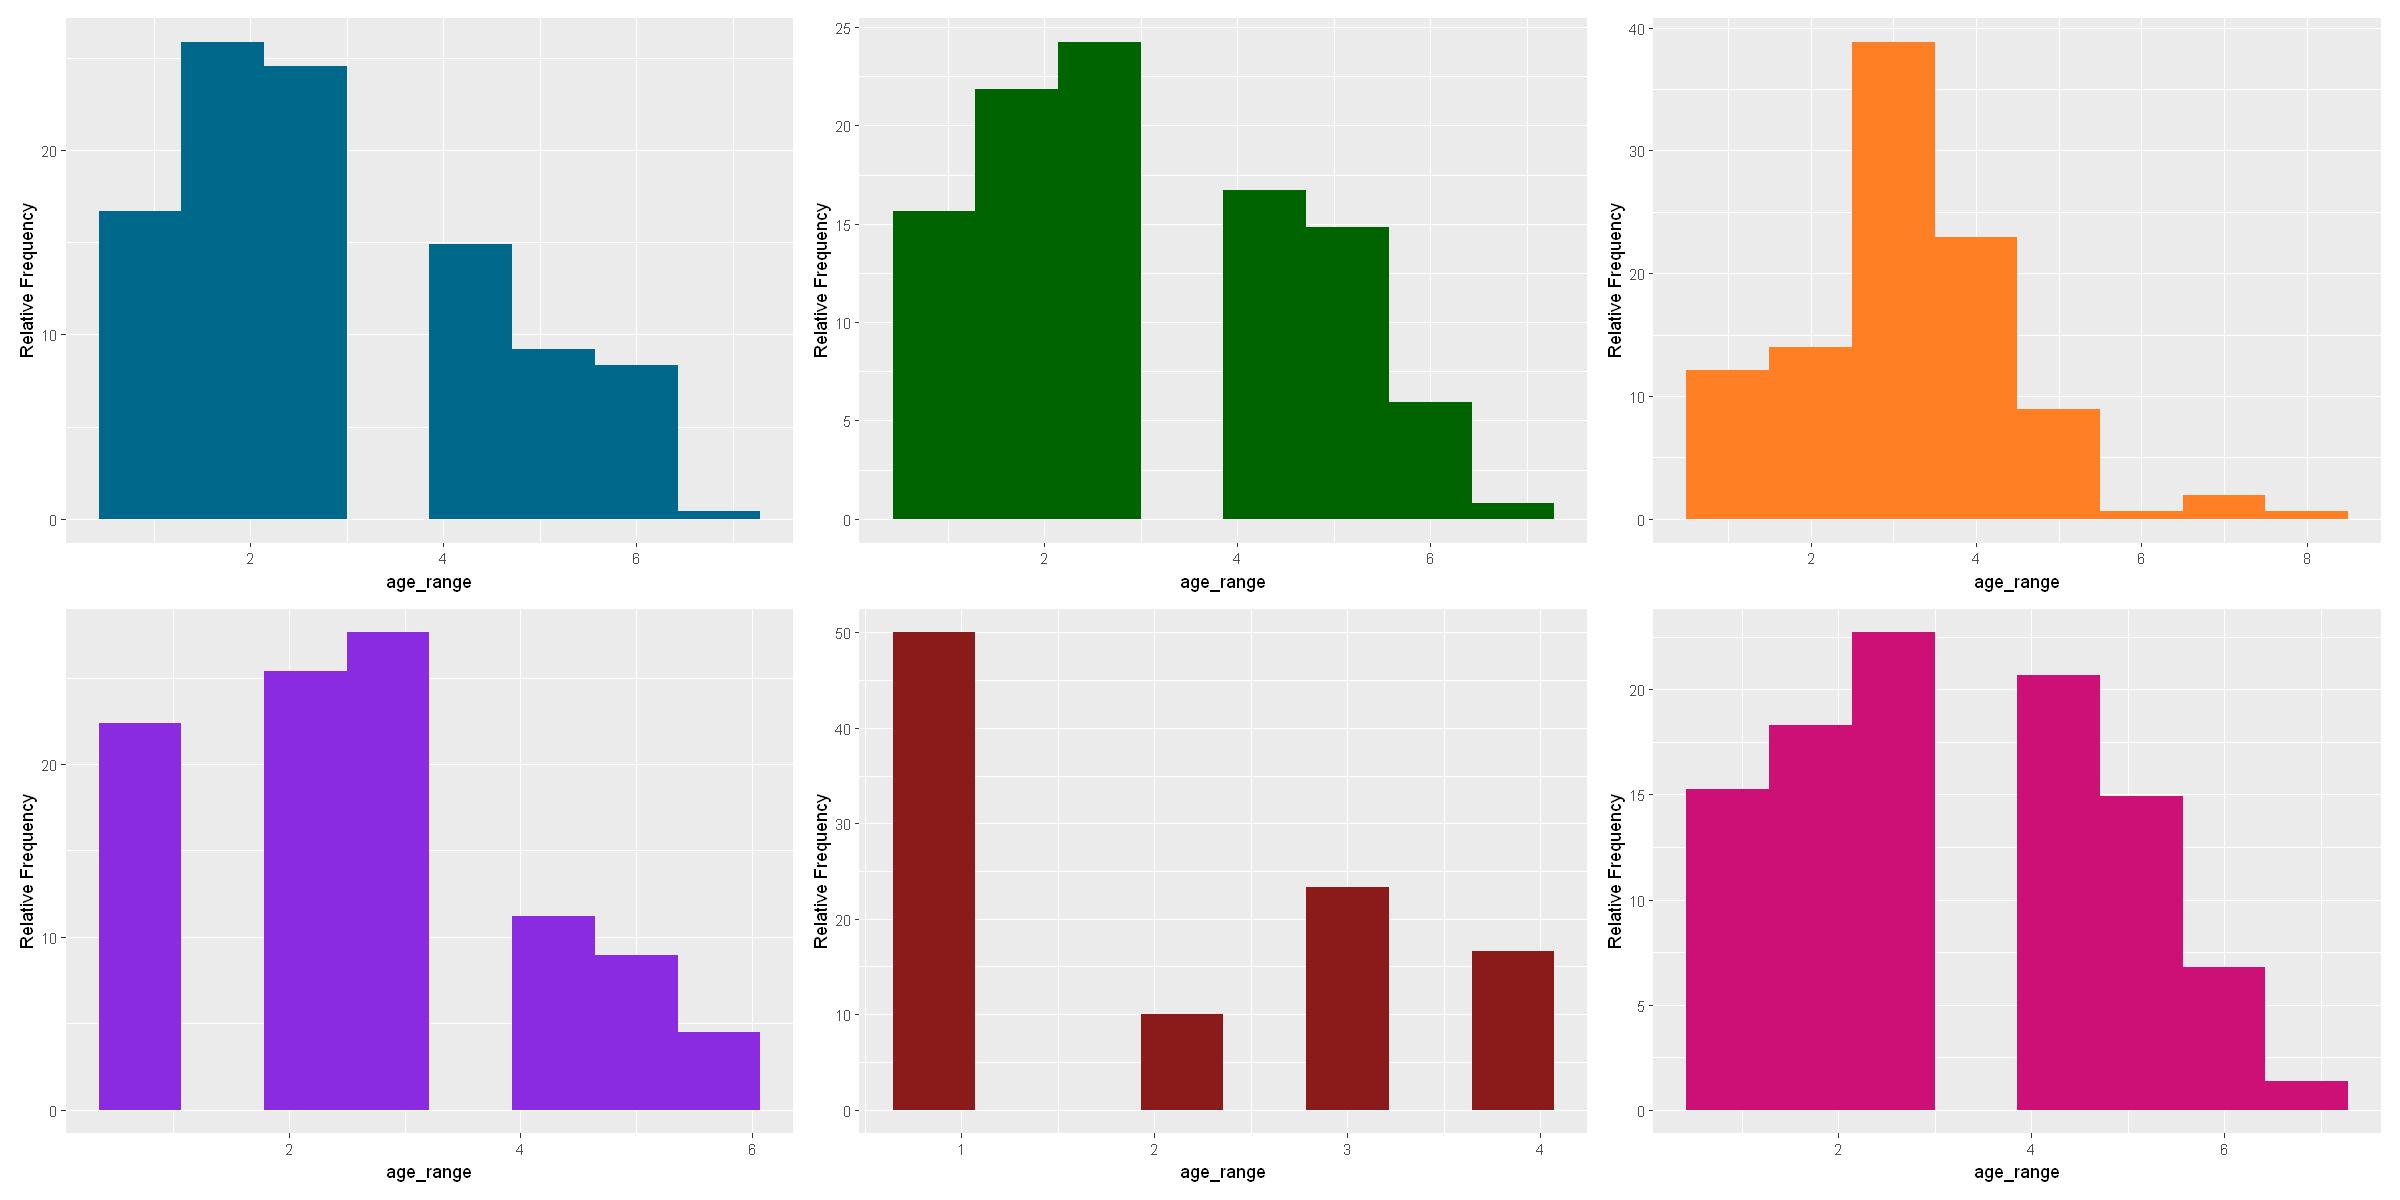

In [34]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=age_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 8,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Sex

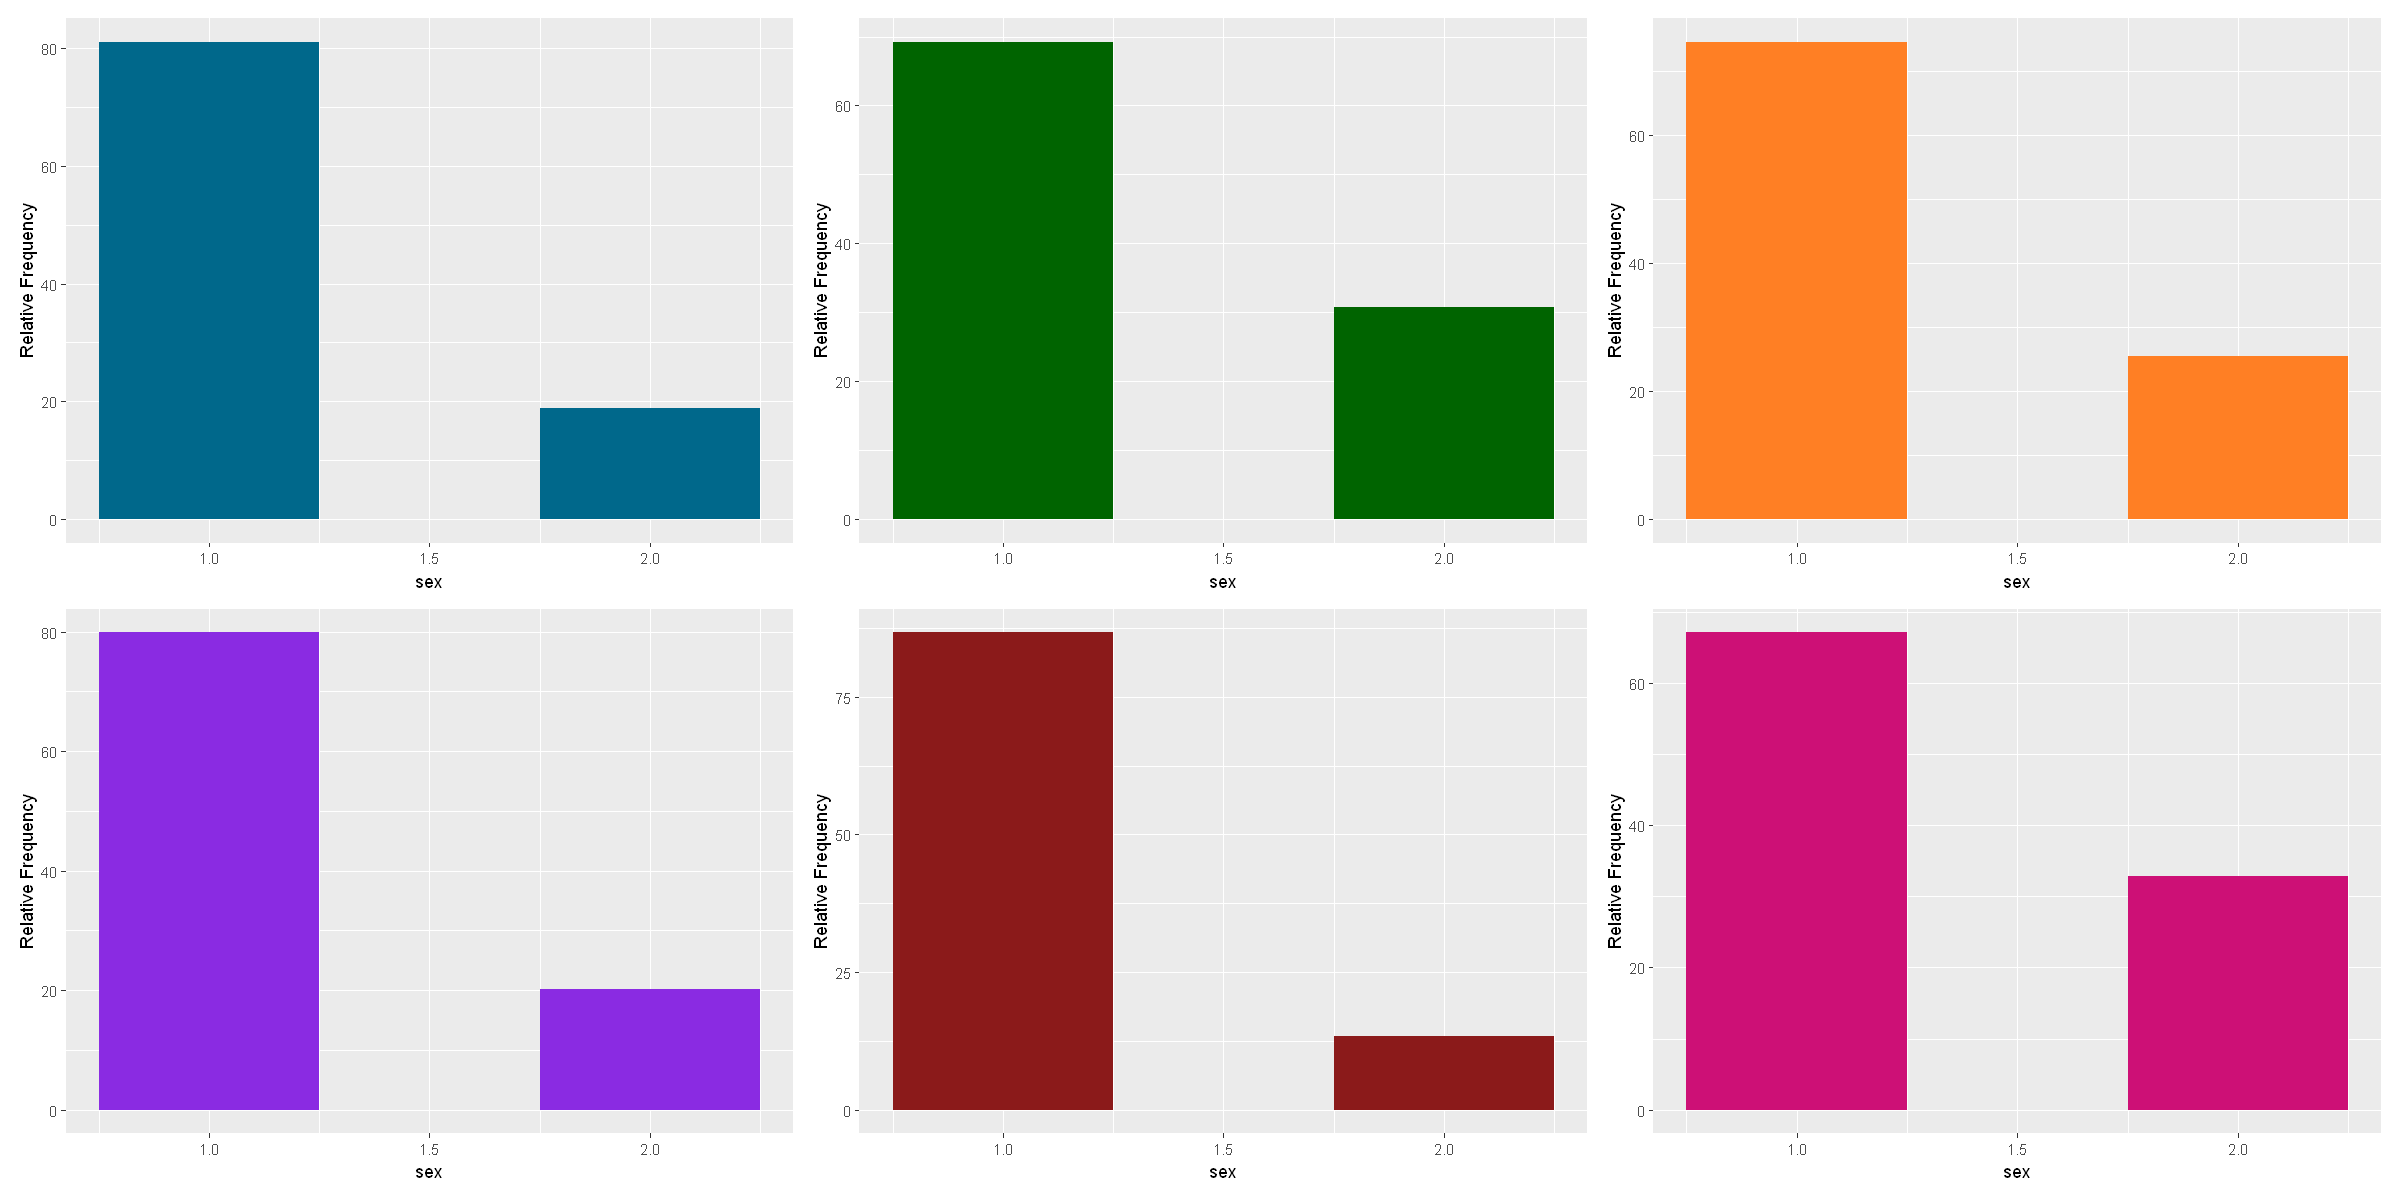

In [35]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=sex, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Scholarity

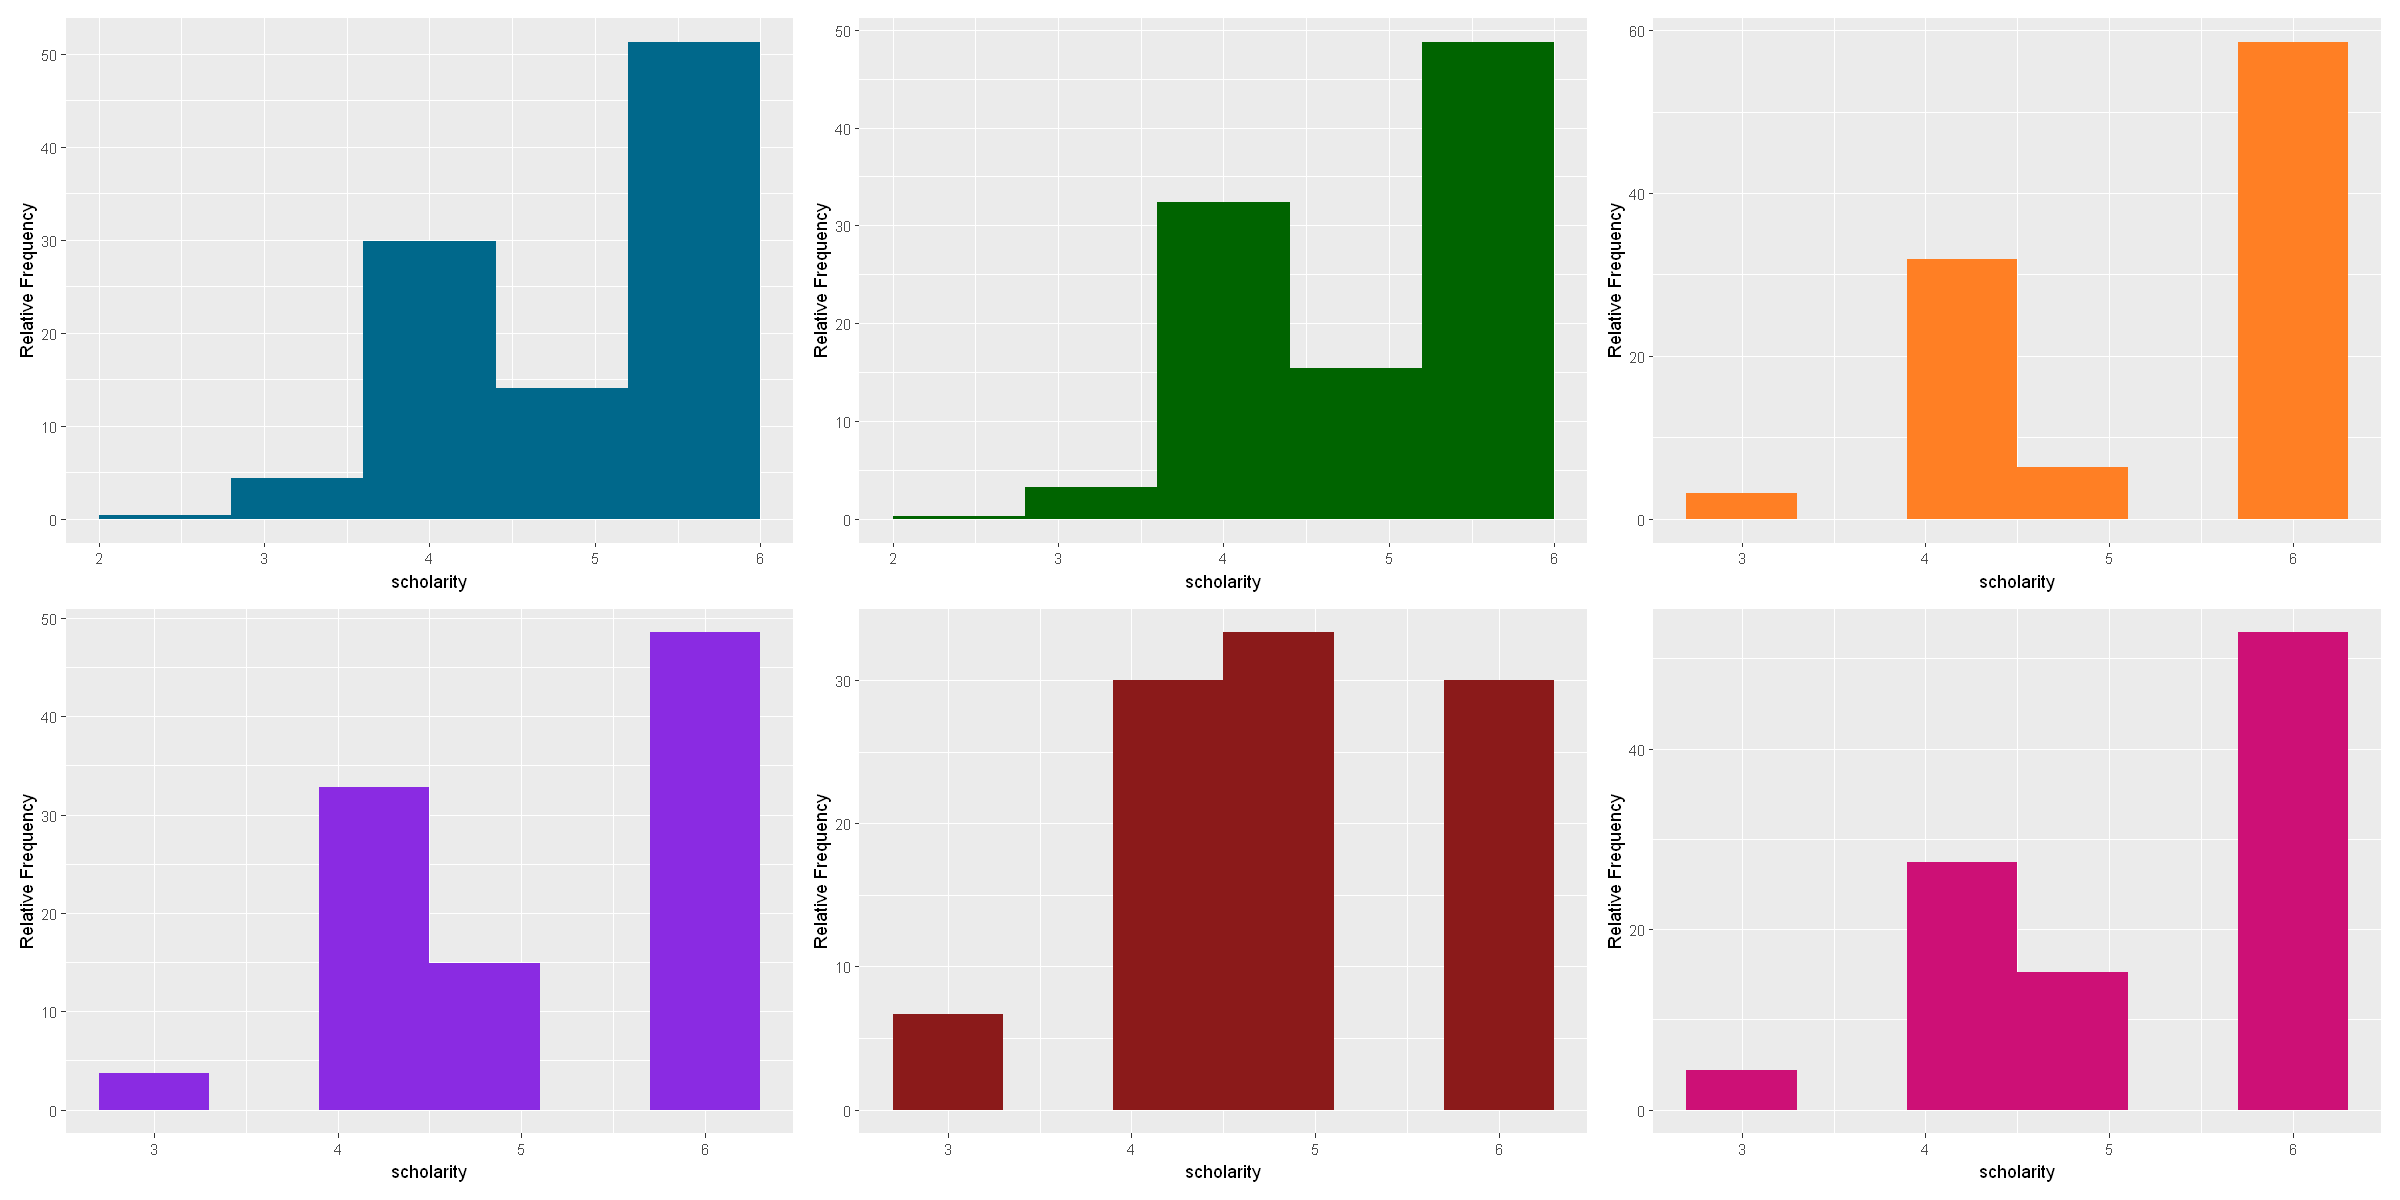

In [36]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=scholarity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 6,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### All charts

In [37]:
df_during[, -c(ncol(df_during))] <- lapply(df_during[, -c(ncol(df_during))], as.factor)
lapply(df_during, levels)[c("volleyball", "basketball")]
df_during <- subset(df_during, select = -c(volleyball, basketball))

$volleyball
[1] "0"

$basketball
[1] "0"

In [38]:
dummy <- dummyVars(" ~ .", data=df_during)
df_during_encoded <- data.frame(predict(dummy, newdata = df_during)) 

In [39]:
df_spider <- df_during_encoded %>% group_by(cluster) %>% summarise(
                                    practice = sum(PA_practice_during.1),
                                    sedentary = sum(sedentary_time_range_during.1),
                                    intesity1 = sum(PA_intensity.1),
                                    intesity2 = sum(PA_intensity.2),
                                    intesity3 = sum(PA_intensity.3),
                                    duration1 = sum(PA_duration.1),
                                    duration2 = sum(PA_duration.2),
                                    duration3 = sum(PA_duration.3),
                                    duration4 = sum(PA_duration.4),
                                    frequency1 = sum(PA_weekly_frequency.1),
                                    frequency2 = sum(PA_weekly_frequency.2),
                                    frequency3 = sum(PA_weekly_frequency.3)
                                )
df_spider <- df_spider[, -c(1)]
df_spider

practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
127,99,69,50,8,41,63,18,5,85,30,12
286,128,60,175,51,56,185,37,8,114,108,64
112,57,36,68,8,31,66,15,0,64,33,15
85,65,39,44,2,15,63,6,1,66,15,4
17,20,10,7,0,9,8,0,0,12,4,1
267,59,40,160,67,39,161,57,10,69,96,102


In [40]:
max_min <- data.frame(
    practice = c(300, 0),
    sedentary = c(300, 0),
    intesity1 = c(300, 0),
    intesity2 = c(300, 0),
    intesity3 = c(300, 0),
    duration1 = c(300, 0),
    duration2 = c(300, 0),
    duration3 = c(300, 0),
    duration4 = c(300, 0),
    frequency1 = c(300, 0),
    frequency2 = c(300, 0),
    frequency3 = c(300, 0)
)
rownames(max_min) <- c("Max", "Min")
df_spider <- rbind(max_min, df_spider)
df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,300,300,300,300,300,300,300,300,300,300,300,300
Min,0,0,0,0,0,0,0,0,0,0,0,0
1,127,99,69,50,8,41,63,18,5,85,30,12
2,286,128,60,175,51,56,185,37,8,114,108,64
3,112,57,36,68,8,31,66,15,0,64,33,15
4,85,65,39,44,2,15,63,6,1,66,15,4
5,17,20,10,7,0,9,8,0,0,12,4,1
6,267,59,40,160,67,39,161,57,10,69,96,102


In [41]:
create_beautiful_radarchart <- function(data, color = "#00AFBB", 
                                        vlabels = colnames(data), vlcex = 0.7,
                                        caxislabels = NULL, title = NULL, ...){
  radarchart(
    data, axistype = 1,
    # Customize the polygon
    pcol = color, pfcol = scales::alpha(color, 0.5), plwd = 2, plty = 1,
    # Customize the grid
    cglcol = "grey", cglty = 1, cglwd = 0.8,
    # Customize the axis
    axislabcol = "grey", 
    # Variable labels
    vlcex = vlcex, vlabels = vlabels,
    caxislabels = caxislabels, title = title, ...
  )
}

In [42]:
df_spider <- df_spider[c("Max", "Min", 3, 6, 8, 5, 7,  1, 2, 4), ]
df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,300,300,300,300,300,300,300,300,300,300,300,300
Min,0,0,0,0,0,0,0,0,0,0,0,0
3,112,57,36,68,8,31,66,15,0,64,33,15
6,267,59,40,160,67,39,161,57,10,69,96,102
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,17,20,10,7,0,9,8,0,0,12,4,1
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,127,99,69,50,8,41,63,18,5,85,30,12
2,286,128,60,175,51,56,185,37,8,114,108,64


[DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
 [DATA NOT ENOUGH] at 5
NA
[DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA
 [DATA NOT ENOUGH] at 7
NA


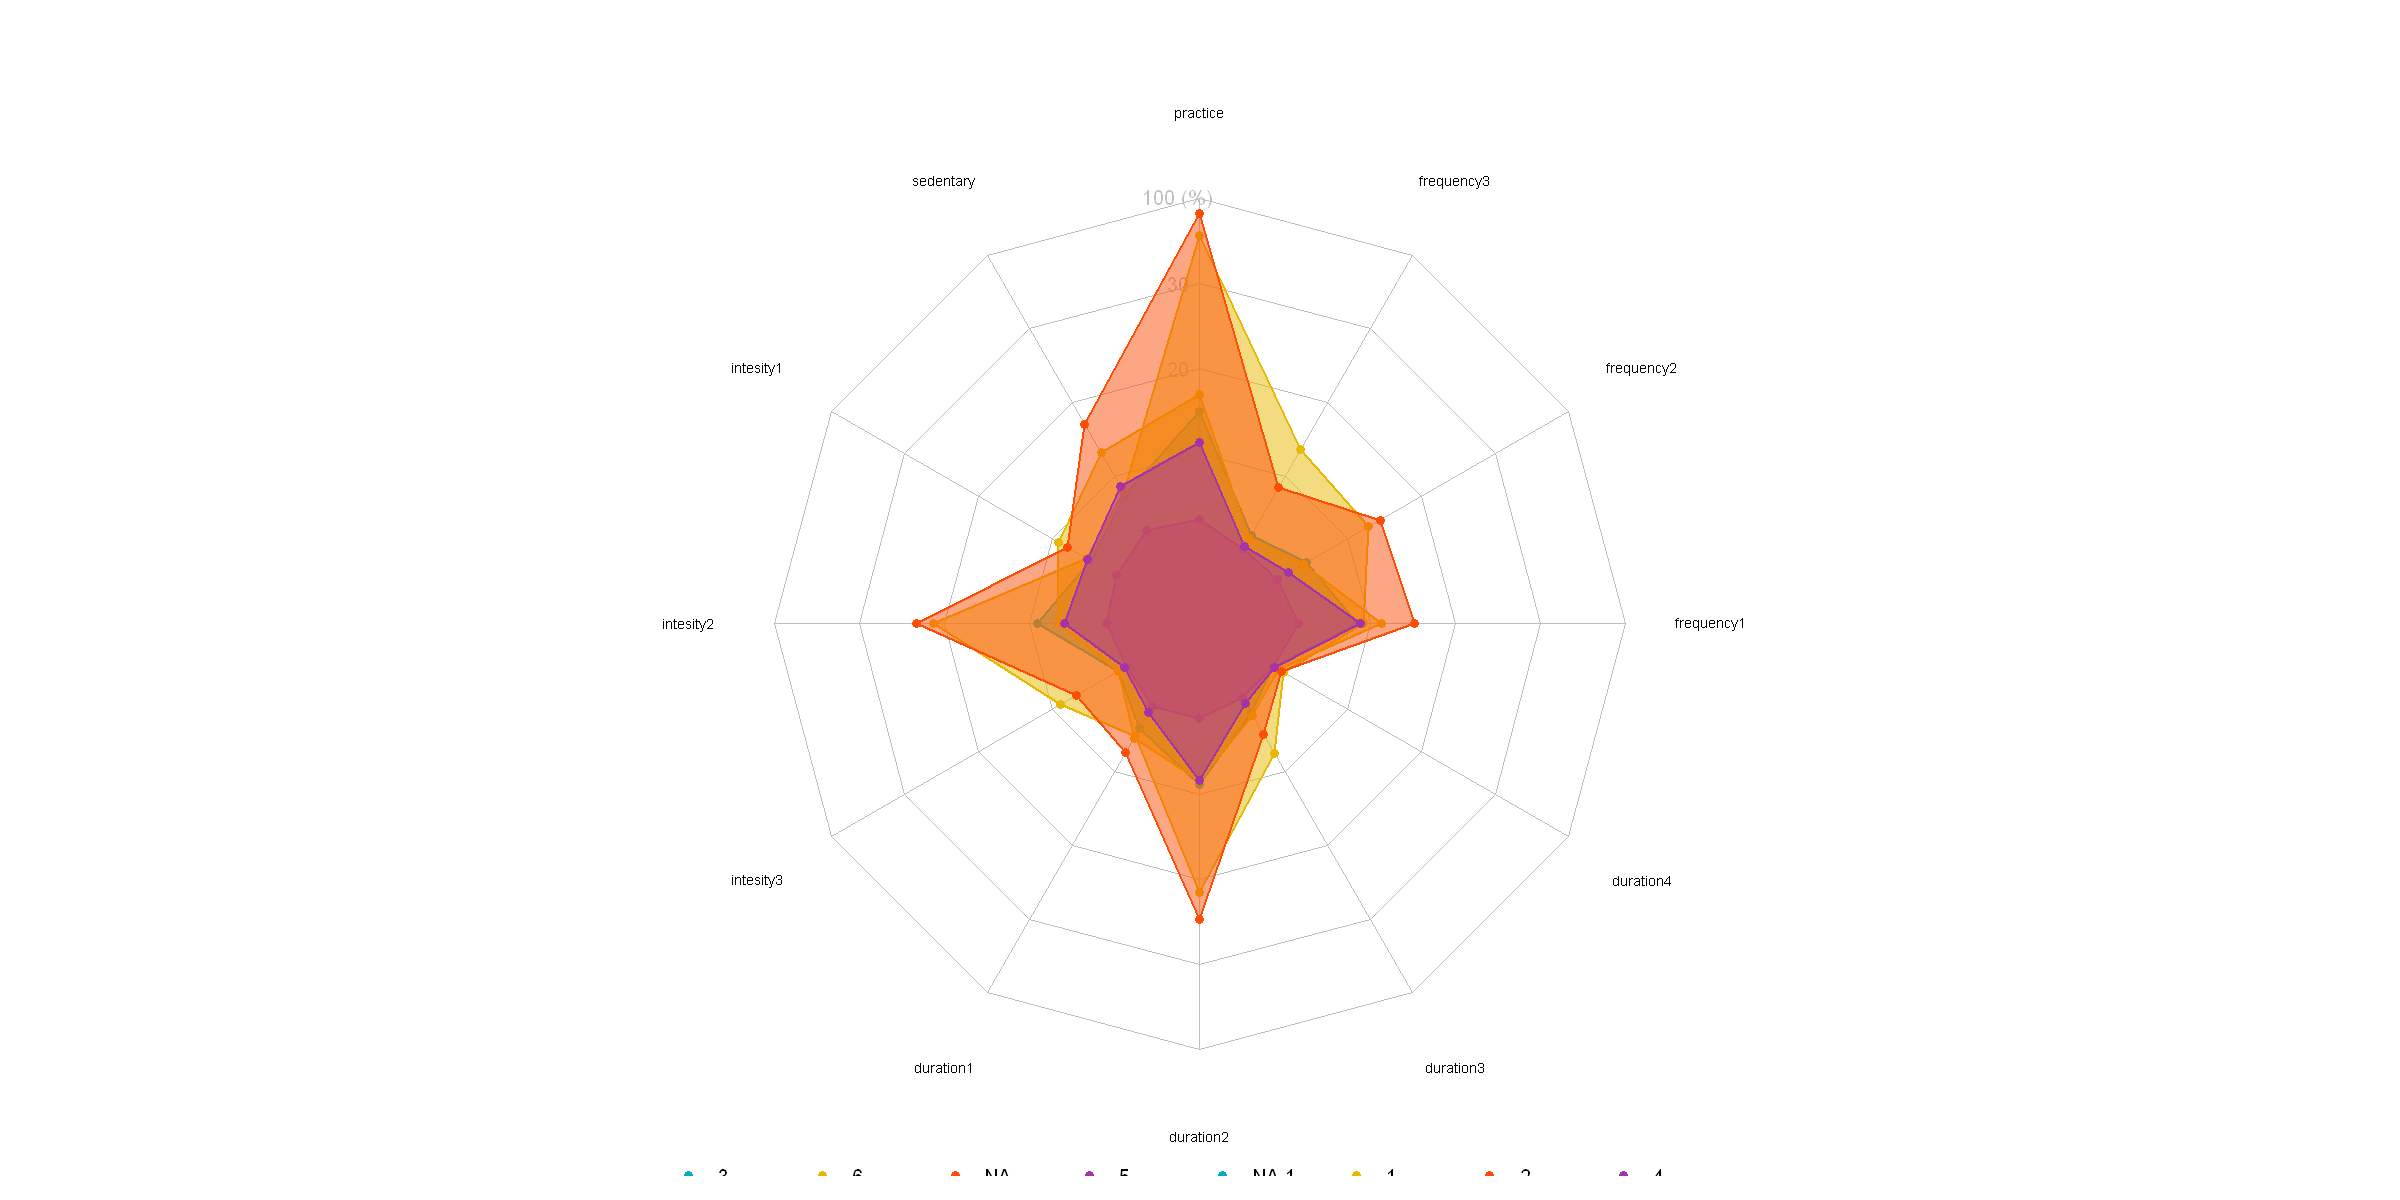

In [43]:

colors <-  c("#00AFBB", "#E7B800", "#FC4E07", '#a432a8')
titles <- c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8")
op <- par(mar = c(1, 3, 3, 3))


create_beautiful_radarchart(
  data = df_spider, 
  caxislabels = c(0, 10, 20, 30),
  color = colors,

)


legend(
  x = "bottom", legend = rownames(df_spider[-c(1,2),]), horiz = TRUE,
  bty = "n", pch = 20 , col =colors,
  text.col = "black", cex = 1, pt.cex = 1.5
)
par(op)